## Miquel Monge Dalmau
----

# CNN Transfer Learning

In this notebook we will learn how to finetune a modern
CNN architecture from the [`torchvision models`](https://pytorch.org/docs/stable/torchvision/models.html), which has been pretrained on the [Imagenet dataset](http://www.image-net.org/). The [`torchvision models`](https://pytorch.org/docs/stable/torchvision/models.html) module implements lots of popular CNN models such as: AlexNet, VGG, ResNet, DenseNet, GoogLeNet, etc.


*Credit: This notebook has been adapted from the official [PyTorch finetuning tutorial](https://pytorch.org/tutorials/beginner/finetuning_torchvision_models_tutorial.html).*

The Imagenet dataset has 1000 classes and millions of images. Training a ResNet-50 model on ImageNet-1k with a single GPU takes several days. The key idea of transfer learning is to reuse the knowledge learned in one task to solve a different task. Transfer learning is specially useful when we do not have lots of training data for the new task nad/or when we want to speed up the training of the new model.

For the target task we will use the [hymenoptera_data dataset](https://download.pytorch.org/tutorial/hymenoptera_data.zip), which consists in only **two classes** ('ants' and 'bees') and only around **one hundred training examples** for each class.



<table>
    <tr>
        <td style="text-align:center">bee</td><td style="text-align:center">ant</td>
    </tr>
    <tr>
        <td><img src="data:image/jpg;base64, /9j/4AAQSkZJRgABAQEASABIAAD/2wBDAAEBAQEBAQEBAQEBAQECAgMCAgICAgQDAwIDBQQFBQUEBAQFBgcGBQUHBgQEBgkGBwgICAgIBQYJCgkICgcICAj/2wBDAQEBAQICAgQCAgQIBQQFCAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAj/wAARCABgAGADAREAAhEBAxEB/8QAHAAAAgMBAQEBAAAAAAAAAAAACAkGBwoLBAUC/8QANhAAAQMEAQMCBAQFBAMBAAAAAQIDBAUGBxEIABIhEzEJFCJBFTJRYRYjQnGBCjORoSRDUmL/xAAdAQACAwEBAQEBAAAAAAAAAAAGBwMEBQgCAAEJ/8QANhEAAQIFAgQEAwcFAQEAAAAAAQIDAAQFESESMQZBUWEHEyJxFDKBFSNCkaGx4QhSwdHw8TP/2gAMAwEAAhEDEQA/AMTFqYukS3ULW0vt3766VtY4tSgWBjM9SoI+hY0hUxhMiUhKQBvyPfpYVDitx1WlEW25O+RETvIwYrTrcVoa1+Y62P7da9EUtagVGLKqeYFys/zpiz9t79vv025E2RFb4fSY/EOJMbWiVEQ8XGyFBSUklP8Afr27Mt/IvnE/kkZgtcG31UMiVqk4muEMz5NRcRDgbaA9VSjr0zr7+d9A9V4bYlFGdl8AZOefWIplSlpCVRqIwx8Nrm5xrxvjii4o5IVCybKercKoPx48VpfyIU6lSmngsfW0QSk+3g/56TNX+xpuouVV5oKeCSNyLm1gd94MKQqfZaSwFDQT05dLw8DMXw3eMGbeT2B8+3ozWaBlm1W20y3aRILDNypACmkyQj/cDa+5SfvpRBJHW1w7WEFpUrMIulWbEXz2PI/xF2oyxKQps7fp/HSLg55ZbRx3xFc962tBrMUUaKmZLZkoVt1jYBU2QPqICt66weOZxyXUlmRuFKIH0ielSmpOpzPtBk8acpWBn/ivbtxxJdPqbT9LaktvJUlfavsB8j7/AHBB8EbHWHLcZIMsW3MLb3+m8a7lBUhWc3iQcOrYsLFOJ6NiTElATbVgUkOsU9lX+2ylTq3C02T5UE9/aD5OgNknpsSU2mcl/NaV6Vi4J6np7bQKD7twoIynEEs1QJ9Th1GjV+clUN4HQ39uq8tIrbZW1NKveL6nNSwtsbRyR4NNp9KbSlltIWPGyPboHfmnXj6jAY0wEi5iNXLXW2W1jv3obPWtSqfqINovMJ5QM9115Dylo37n/jppUenkZjTS0DiKudaCz6nhRPnouQu2IkVTudotjEl62vadX1dUVaoat9riU93af/0P06FeK6LNTbV5U5H/AGImaYQnDgxBicensESeRuPrtbRSWXY8sSklD/YPVHsoJ2B3dYc67PsU1Tb97C1/pGI5IpU7pTtG3i1+b+M7ZtKifx/IZVQVxG0h9xaVJUkAD6knpJy4l11EPkW/YwXFbjbGlW0NQxHkLFd8NWRX4kJD9Lkx0yYUxsBbQToa+oeNa/fpgSvE8iq2MiKv2a8RqScGPq83uTfFjC2PaTUMy3fYVKRKeTEgJqLyNyHT5CG06JUfvoA9AfiNU3ZuUW1KI8xyxsB069gOsE1Ep+hVzgQBll3lfLi6w9x8x69Npc/a5DMZoMRyVDfqewGyDvwPPXE8iOKJpbrcqCrkbC8Fs3MNN2JIt3iJWtf/ACfw/dNUaekJk0eO4C7QZckNhtxY7yqMSPKRvyN+/W5wn4h8Q0gJps67oCDhKsG3btGdMSUqpXmKA9XMRdd+Zm53XouBcWGsd0SdQmYv/ltPyVKW6nY7vT7P6wnet+Njz4Ow+ZLiSuVVCy0Ck6bpIyL22Pv1iu7KSbLYUFDVf2x/uOeLViY7Dr3foJ+xPg9OCR9SrQl306U3vA53fXFJUsFej+3TNo1OuBHqVetA/VWd8zIUe/ej+v79MaTY0Jjel3QFXiSW7a913RTq1Ubdta5K/Taaz8zUZEGC7Ibp7X/2+pCSG0/uogdV5yZYYWlLywkq2BIF/a+8ETStQ9MQSoPgjSTsf9dazDVt4x6g6LYj1Y8s3IF/3pSaDjKi1SuXgp31YzURP1oIP5yf6Ujx5PVyozEs0wTNkaDjPPt3gXUtWoFO8NXvCy+Q5tNnDOe7hu23r0mJQigtU6M64l9QAPYpQT2q9zskj9t9Ib4KVlqgmckGQtofMFWuPb+AY2F1DW0WphWkna0MC4b3R8V7j9jWDhuoZNiWVx2aeK36rUqe7Om0qEB3raYSn60lQGkg7CSr3146VvijxJwwXHHpVpz4o/gSQlJUcAm4262tBRw4JwpDStOgfiN7gfT/ADGhHiBT8Nc4L5xVeV4wqpkiba4eejuVOIDHaWlIR3Ooc9nfPsB9zvpZeHztQmZp6XqIsUjYbW5C/MQU1KYaS2ky6tQPOHl25IkWFe7FLpdOjw6A8R5CAlPjwAAP8dFVPqs1IVLydNmzFKYlm32NV/UIjuXrCxjVsp21Xrso1CqVWmtllHzP1KSn9vsP06h42oFOnZ9t55pKsG9/5ivIBaWym5xFhR6tNx9cNOti0KHBjWmWO0vsjf1K8aGvHgfr1LT3pmRnkSsszaXI+YcoldQh1oqWfV0jlz5otSdZUGO2/pz1fvryejfg2fTOOEjlCxn5ZTabGJ98NalRLZ5eYZy/lvEFwXZhtioyYsWoTaI7Io66qGz6KHHVJLKlJVvSVH82vv0ReLFaXJ8PPKklpLqNJUnUNWm+cb7Zt0jzQJTzpkNrwDDG/jkcPuNV22VK5t4GpNesvMVar9MptXtGlwEfhlYQ62pBkx47SO5qTtKVrIJSsA/SD5Ij/Tv4ymoaaZNm2Fm52TbNrnl0HfEEFapq5Zy6MjG0ER8DOfULT4P5ExPRrXstjIGQBWIqRWmi0JBcbXHbMpXaV+kjR+nRPg+NnpYeN/FE0/xv9nyzg8oBAJ3CRa5t36d405FxhtlLrl9ac2+uLQMPH7/TQ3xV7lyHb/LLPNHxY5Tg6aQbZZE1uotBHcJPe8E9rR+yNd3g76cHFv8AVJKSkyJSSb9QFyV8+w0n9f0ipKUhyYsoi4P0tFG8KsJYh4P5cv8ArWQshLrF2Ip9RYpjhaaRGlMIQ6qNLjJ8qcQsoTsEgoWCkjwCWDVeK01iVYmflTj07kFQ2V/1oxH5Yyzymyc+0ad+WmdeJvGPBcfN9x29QbicRCbcZW6A468soH5fckkn2Gt9B664XVplKUjW4s2Gbf8AlovIYbaHmv2AEZ76V/qCsPzJcin3dw6k3BTG1FpiXEup6AmayVKJTJYQhX06KRpGjoe46Gp3+mqozE2Z+dmUOBWS3ZSbdgsHI63GY0U8cy7bGhtshfW4II7giCbwh8e/FtDm0K3rHxzZ+GrTeqKFTaZQKeppLEcnSlKdWpTr7g33Ek+fOgOsOf4A4nkXSpttCWANkc+lzk/mYs0ziSmO2Sq4Wev8QdXKf479m4aomMsg4wvTBucLJmRFRqnSotWdbuSk1BHcorciKQAmIpAbAcUd95Ke32PXmU4TrNWIQlJbWP7k+kj369hyzBRPPS8kyXnNj0Iz7Rmm5XfHX5gcksjmv2PNmY7SFFijwqY6448wT4Hb2janDsew/sOnHw9/TzKJImKu8p1fP8KQOg7QvJrjh9XolkhA5cz+ca7/AIWXxhuGt8cZsJYpuTOKa5nxmkNt1Wk1FLrlWmVAJJeISQSs77jsHQA2dAdAPETk/Q0Oidl1JYQTZQHptf02Vttb6wVyaWZwpW24CogXGL39ozSckcCV6s5Hte0rgoFdoKHJkVD7XaEOhh1xKVFG9jeide/S+4SrqpBpxxdgoA4PaAubT8Q4EpOLw7vE924w4iceqtxVq0+6blwrHuiRbzP4jSVy5CpL8shtDXyyFFakuKSj1+0eSk7+odKjxCfrNVqbrEgnzHSnWtKSLelI1EXNhjlfPLpBfTGJWWltcwbC9gb79L94huGciQLBu0X/AHJddtTrFtatyC7AnRO75eK00SqfKkLIajoaQVDWioqUdlPaNr+ku/BS6fhUqM26QEoAuTnItuST22/SamyLjyluPizSed7CBos7lHjDOnJLKmX+OL1Jl4/auJiETE3CaTMUjvSGipGh63a4pJ1pZQrW9Hol414Or1Kk236s0pp1Y1f3WBOxscEW+kVW3pdcyX2yFJFk/Uf46RbvKSf8UfIONJWaLiujFOLeNlPW9HvJ+zZMiRc34AhpSlFL0hAbSlfb6KvS/mJ7+78vkFPhfw1wpNvGZcD0xOkAI83SloK7hJJNtxqNjzEXqlVphtFmbIQNzuf9fvaM6d88wsc59mV24p+OpOP7fhMs25YkWjvBp+EklAXMqD5QsElDiQlISdua2Pp312FSvDeZpWmW80LUr1u32NrkJQLi5uDcm2PeBb4/4oKeti9h163P/ZiL0O465f1h3Lj7POTr2qttVCW5Jp1IfSJBpjqlFaXXFjSUuAaUWm/pAH335hqxElNonKIwkKQMqvbVixAGcHqc84YEnweJ6XDc6vSo7WG389uUBDljCt0YYr0Km3AI86kz44m0ipx9mPU429d6D7hQPhSD5SfB+xLX4V4zlq1Ll6XuFIOlaTulXQ9uhGCISfGHDM3SJoy0z7g8lDkR/qPBh/F1/ZyyjZeJcWUVyu37W5yIcBhKuxIV5KnHF+yGkJClqWfCUpJ6t8U8RSNGpj1Uqa9LDYJUd/YAcyTgDrGJTpB2YeS0yLqURa3f/vpDO4HA+DJ5YJ4uXNWL2z/R6Ky1/EdRxuw22uA+uKHVIdemEMsNsrKkOOuKSBr3SdpHPtL8VpudoArlHaQw68T5SXzYFIVYkacnUMpxbuRYw6Jqg6mxKzSyryzZRQL2J636bGNJnwqPhUcTuMd/3Byls29KJnO4oiZLFCXMuWl1RdrtqZSh5v0IKltql95UkvKIU2g9gAJKzizvirxHO08M1qXQw4DcpSSdQ3SrqBflscHtFaS4VlWnStlesdbbHmD3hxNM45cNZ2Qn+V1icc7Dk8hE0KpQZ9Yo1OZizKoVhKlR3fKGC+v0UNh90d4Srt7wgqBpOcbfG0osOEqaGSFG4BA77WvyxztF5FEQ1MAmySdj/wCQvnk3hN/lXdsK4v4ZrGNLrqrCGoX4k0YaV7P0ltWvdOtnQ+wPSI4arUwsuCt3bWCLXxcHG0ZFQlWysKlMgwPND4ic0KLAbwZR0G3bbShFJqFat1xyq1F6IlWyg6BWwHFBtxTuyo9gGwCR1XpLzip6ZFKQXX3znYISkG9sfML2JAtsOQjWakWmmUuTRwDgWx/J/SPp3ZwUtfC2NnrvfrtSqts25ITOuW3buozbiUvsyUJbeXFUpaXUgrbc9J5CgD2qP6Ci3UZ2n1AvMrKKi3cD0AAjmE3uQbddxz5R7rFLU7LJUMsnJzjtjEGZQLSta5bLoF31yp42vuya++xBqNsS6XDaZqK0glrv9FCdqR9RSdbR/TrqrP8AifXi4mZfmivNlJKQRboU2tYxBKUZgIKfLx23iY1zjZi7DuP8lm8uQdz0DDtQo8uXHsu4rji/h1LilH1hL7+nnUJ0oBTrhCQTvx10TQOEuFKrIqrki35LyQSEJJvrA2SnY3OEgDeMV6cn2FiWX6kqO5GLHkT2jNHlb4VtvUiDamReLeS7Jynjqqon3jUPlJkWXHtx6G6w48w6uM4exJZWAnu8Ba+0DawemIKpUfsuXmn0qWpbHqB9K0WBwoHNxcHYE7Ra4eSwzMOIcXazidNsg55ciMW+sLKuOm2yc9Xaq751YauMJjgwIBLjzkxKdF5ccpProcSAfoKVBR7UpOwk3KIVu8PoZaAAGqylYGkn5b4KSnvfAv3hwtTrTdXMwsk30+lJzcCwOxBvgdR9YsLklbcvLWIafAah0in1WjSXKhBK5oUtbHZ2aZR7qCwhS1AhJBGwD5BEvDRkUKrr81epLwAwPSTe++1xsOu14/fGWUNak0Oy7GkNZJtke459+m9oXFx/yPlHA3ITHF54wTHYyNCqzUOLFkgmPP8AmD6C4r3aQVMvJdKCUneldyTsDrpLimgU+tUh2Un0hbChci1/l9QNjzBGx9o5QkH5mQmQpGFp/wBcuxEbtcXfCaw3i7AOZbLpLeQLdtjJEymVe9bfiTG5qPSbUh16kioPJ+ZcgKd7/wAxDitjuUr7oitUYPvy9YnFLU9LJ0tlJCUgG2SkfiwADgDBAxDDptScZZXKMgBK73vki4sbH2653zBg2XxkxZgTH8mh4FsSPhqmMxlCNDokpbafRL3rONlJ7kqUsl3ayO8950pO9gQ4yX54XMzH/wBldVFR2A0k+3+I1aC15VkJ+Ufl7wUdhz7exhbEORXKRW6nErEUynmoKUlUF5QCkJcQog+W1BXjewD4J6Vb1DLA+DfQVB0bXsAeivpvBcJpKh5qTbT+Z9oF+qV3IOZrmxDZDrpui2qW27V5C2VFmUA06GkoJGiDruJA9+39+kPXKfPLeZM4rzikkqTc2tfkd4+UltJSlpOi+x6wxu85T9m2rZ1WxbaDNcqshJafZZ/nS0pSkKSsp91DfgknxsddJV1c4xKyj/D8olWNJCfmSLYPcf3c4qUllhSnW5xy1si+xzkdvaKNy7iTGeUrJuW1czmn2xflaYbrtNbCHgpFSSpRS8txI9NW1fyyhe06142B1LMzshJBT1TSlubcSSLg5PdWbXOMGK7skqZAaaJU0D2wMWsP1gS+P1StS2ZVdsJVoW7VqdIWhgwCwAkOt608knZC972rYO9+3WLwuzLzVUVQGSHFLN1ax1GrYDAF7Dp1iCZV5Ut8YsWANgAeht9b9ecSDlLxywRek608h5a4y41yBVH2RQmJtVpCKiuNFUSUxx3dw7CSo+R5J9+m3xDKucNybbcgi6CsDUi4seRIHMWtc+3OMqmzyp0q1Ktg4Ntuf6QqfkdiL4cdYlW1jW66viPjNl6NDkQJ9PsyqqtWozKcXkrAkCAppLjClNtuKD4UCUJV7oGoeDeMKy5R0vThUp5tSmnCpvWHNJ9KiCCL2O4teJ6lTUh/7sXbICk5tpvvY4O8Kkuvh7iqVx+z9yht6zruse2Is7+HrAZpkmRKk1K34rzgm1WQ8orWt2c8FLbeUVD0mWSkkLBBdUa5NAMsagpZUlRuBpClYSk2sAEJ3GPUSDBBwlobqWiYulNlJNidViL3F7kk4t2taBIta5bmrNlUSt0W1LJsJmIltqdMuNwRTrZK+2GNuLQsdjgCik7WT+p6EJ2mSrM44h55b6iSUoaGr2Gs+kWNxi+3sI6Seq7zskG22UstkZU56DfrpF1Z3yRvm8HZgrhMznjImMOYmKrdxpV6Vj64YlRrlNtxp1iDUkRn23wmnR3AtTmkOq7m+5RbXHVskOJ63eH6/U5SVekngshViA5lzJsciwNrcvwntHK/GtGk1zaW2tPp2Un5TzA9j72BHeGs/Et5tchMOZy4z2TgW1bsquLPRj3/AHTVGWO6DclNlKUw1Hbd8pW202HXVaOw4W9/l6hqzst5Tgfe0G33Yucne9hy/CL878xElBpoU2pak3N89oOi8+Tdo25a+O6/Ll+tYVd9SO65He7XkLCe4BJKVdoI2Ce0/fWvfrldHFc3OVANSwDgT6ikkjAOcwWLk5dqXUp06b4BtffaCeol4ryHZrNwU1yJEiSktKTodyW0AAJQknydAAdPatLen5L7hYSTvAfKIDa/UI8WEr/4wWZnTKWHLmfqtJynbcgrZ+ZjuH8TjOsocS4w6jSF9yFo2zvaDrYHSvqT1Fk3VrmgQkElJ31flkHoCLEbEwQNMvuJSAQTbI6fnFPU3kzdeILyk3tJohaxT85IjSmJD/YqmLUkFDaUL0olXchWkg/r7dI2h+NU/LTzswyNaCqwbyCR1GLCwyb2jXnOHkKKUBNwRckciOsDxyZ+IeMg2tbeVbftWsWZRabGdgLkTEKU1IbU/tzTrYKUKAG092vcnxrrd4zrs/xHWZZSG7eRfF7gqJCgkjobZ/KKTVN8tlaZZQJVv25fmIAbGXM8UyQ9kC3mptVoVPUoz5QYUtLKSra/UWkdo0nzskdNfgeSfp1QmJ+ZOmbmFE+wPIc8n9oxanSVNy7cuvKEwzS8/iC2ZlXEVXtXHMa5q81WmTCMksKiPpjKR5DBSrvQrX/tBGv6fPkTcUeN0xK6qW0kqWfmV/gc7nmeXKJpLh5AUJi2RsN8/taACuzGvA/krUqZUK/h6wHMuW3TmW7lfW04EuJjElhqQjuCXwfzErBJ9iSCR1Ro/HtTl5ZptJUwldzg2BJwbc7kcxY/XMEoQlwqSohWwNxfbP6dNoGesfFr4J2xGvLFdxXFXoEeHGkUmbS2aG4IjiEAtmMyWh2aI8J7dAftrp0Unw24ofYS803qbcsQdQzfmQT9YCJrienocyr1pO9juDyMZqaFJozWUmFU2JT5mP7g75dMn3VU1FLsdbigjuYc2S42B6ZACvI2D9SeugJtt0U8+YSl5mwUlpAuCAL+ocjvc29t4klauHppKj6kuZCnF3z7HmNrZjWJ8Ka6Lyn4aqkO2rnpFzmm3R+HFdKhqiRoSlMNvLbSvu0vt/lnuAT2k9uj46594rZnWptC5VtYCrGylDUR1P8AaOvM7xeqUxLOq+8Ukm1jYWGOUNDzRcVmW3QG5CrOpamlNzGJEV19IbjKfKVvKjII02ha0qdKPbvWsjQIATfiRxu0NKg3ZWUlPP6f9zi9RJJ0JVm6Tn3tEc4k2JgzO3G+qYXv+2KbVwRJajyXkgSKV3POKjuMvD6m3GtpKVJIJHg7BIO34XSMrOShQkJS8sZVbbsef0jFrLiwQ4q6kA4EEVjPjtVMd4+t3GMXJS7/AKxr0lyEMJgteoB4+nuWU7/v1qVbgyfbeRL058OoV8w2t+UfSVYZUhSn0lFtud4gtpcJeNnGqzLDsvHTNGnX3Wq1DkzLrvaZLrNVqkBwFbyjJUoKCiS32tgtoAA9tAmr4nS1LqBblH3Qy44UgK02FrAYAsB/k7mJuG2JlhKnUpKgAb+/c84IfO3De1aHaNs0CBU502jvzkVOLPciNlCprTiHS2spHY2XUoUgkDygr+/ulONv6fnKTNtvUxaltrChqIsEki2bHvqF+YG9oIZDikzAPmpGra1+Rx+mIE648N4uyjaGS0W/lS1Lutqt0dNPlUWn1NJajSEIcSrtSgkKC3FBa+7yFNo1rR3Re4QlqdMNzkq/oQzmxKgonmTe4OR0FrntFxLjplwyUdbEbZ22hXVOVRuEWJrox87SKTV3XnJdTSwgoVFlyHW+1SXW1pVvylIAKSCn6fv1bnqKjiWotVNM7ZxsJSU9gd0nke+/eK0lNKbSG3k37wvTDvKqh49ep1v1pit2Zc7OywzKjKabkJJ89iSACPOtD26aHEHhvNKbcmmAF6s6hYke8Xp4ttLHwygpIi1GLf5C3tb993Lg/G9Yq711K+UFSSAhhO1aLqjsEpSCVHQJOjrqnw9wkqZfZM5cttcgN7ZsDtc7dBzgTqdSW0FmX+Zf6dz+8Zn+WWCKxx0zzemKrgu+m3vcEJbb86fFjLZbW86n1FJCXPq8d3uev6LeG3Ff2xSG5wS5YTlIQSCQE+kG4xm0JniCmfCzSmfMC7WNxfnmLIsHK9wZgtqyMD5Btu07wXBTHpNs3FP9VFQt+KhRUhhK2yEvoSSUt+tsISpSfqT2hIpxRQm6VMPcQSTq0EglxsWKHDa17HKTzOm1yL73uacLTT08yimOoSUg4Vayh2uDkRrV+EHCp2LMCXDYaLWlU2FTrllfOPqfLi6zPd7HFzthKW22wFNspQjegz5JO+ua+MuL3Zx34wOCziU2FiNITgDJNyNyTbeDBmlIaWpi19B36k5hgTuF77zddt4VatTIQsNiURFcV2lySAkaKkp/K2n2H3OvP7pr7CnXluzRUCL+k2BP/gjZM0gAM2sOcXPxZotcsu8Lrsz+HVu2H9C26k0Alt59WwvYGiPyp0r28/t0R+GdafokqtqfQVlxRIAGcwP8Q0xD7gVLGwHP/UHnbmPo9EuKNUGKtJnhzTqV9qdRvPt+514305abQ0NzBnWlK9Vieie3/sDj04SkNKA5/WFZ8Tuc3G74kcd25Ztj3pb9MtmHTpU964UCK3PcX3qfDbiVlLjLSm0JKu4BRUDoAeRjinhSTS+hirBPmo9XpVc45nn7DeCCk1p/SXpO4ScZFhnpFo85/iKRcMXrg3F1qUqucgJapQrcsWq5GciQYfa4236vY4vb5WNhtXs2e7YJAI5Wn599wpXNILKQClOxUb7EAE7c+8XafLAODS0rJyeQ+pxmEZWpxZ4/Y5vzNWdrOm5NsSRWa5LqVJoP4kW/kVSXC4Y/pNKCO1K1rA3sga2d9BPHnGlbq6WqWWUlKQACUgmwxlRF9vpFr7KYlUrdDts8jb9IJS37Cxw8abVr9nSKlcDMlmQ6iW8XChrW9aP7/wDY6XfDsqpmfS2lOkJOcYNukWky2hhS9Vyocz1gi7LwFx3zfl6zb4qNGotRh0d4kx5TafLvskDY0pJBHn3+3XQEnxS688uSfaLaLApVyUOh7gwON0pTKEvpcuTunoYY7KtAU24KdbllWXBtizG3U6LQDTSVq/QDXv1lVNue+KShlBS1fJ2H/GNJkNFJKsqjHJ/qKuM2AsX8k7PqmIHLkqOa69Acql5U5l1UliOwhIS0+UefTJ0RoeCEk/bfXUng5xG6htyTdIDDdgCSB61Z0g88ZPT6wEcScOl1xL6ASpW47DH0hZOJs08bcFWTiyu2XxqpWZ85NNmTctdyBJkLpdMkeuShql0yO8hLnY2lJMh5XkqI7PG+t6pUqsT83MtzsyESpw2hCQSU2tdxRHM/hF7dYmSluVYbMui6+ZJIF+wEaJcEfEehUesW7bWU4dsUjHN0xm2radtuhNRI8aoL2ox3Q35AcB7go/1JIJ89c01jhV1TSyhN/KvqTgWG1xzwd4MWHwVA3yq1veH3YWq8Gy7YmV0TIlRpzsZyW8iTKS20ygpJCiSd9h7dbH69L6nVIySigDUk9SMd40H2PNN9jF7YkVUrqo0OrPri0VEqF8y20ygLJB8hP9gP89MLg6mtVFaniv1IGw9oH6xOFkJb04Jic4+Tc79ceZqkeVDo6XCgLWrQI39h1r0h+cZU4icH3ZwIzZtlp3SWj6o5eGI+fHJ2iWPa3HuTmq8YeDmVJhfgjCm22/llL2porSkLUgknaSojrozi7wfobzztWRLAzJubknfra9r/AEgFk+J5xpkSoX930sP3teNXGEuTfH/HeHrXRNfoFPBaR6pQlKFOqUBsrUkbP/PXKsnJNS763A0PMO+CTiC9+bfcl0tazo6coh3JTlhx1tK3m7ymvPpp8aOuZHj05rvMuZr+UhY+yCSCT+3VFcpPVWZRKyKQVE2N8ADnG1JMNsILkwcAe8Kexly/urKlz9kic/HqNTmISpSjoJClAD/AGtDon4i8PU01PmnOnMeEVxLw0CNXWHsXTMC4qsC5a44i+KrKU292R060lRCgdfqN+/SY4rnJpp+XmUm7QudI5n+IIaVJN6FIV83UxcfPzJs6jcdaAuDOetp+t1aAlUxh7036ekLBKgR5B+3+etLiqsvzcu2zb5yD3xEbMmEXUncQgPl3xfdxrnC1uUlz1S4r5x5dNKFFr9Sn90kQlq0GVqWQQhAPj7Dz0VTcvNfYKadLrusKC0kb3HzDuecadDrTLcwVvDFrQmen8Df4lyXmDHVPuSZSJ7NO/HrQQhAcRVo5e/mIWfcKbSdePPkHpxz3jA5JSklNOthQWrQ6f7TbBHYnOekCL1MVMrmGWFWUhOpI65zGk3ht8PjAUjD9k09wJvL8N9GUTLUVFh78yTvexpWyNaI9uqdfmW51Di2ndK17kAG1+gOLGB+QDyFJStOoJPO/7xSvNCyLUh3CJtIrdYpuQ6GYVGgtIecahTGUL0hptgrKSjbiiT5Pdskk9JL7NTLsKlnHPONzclIBtbGRzHWDd18uOeagaNha5IJhjXHTlrecW2IeNrbo8KTd0LsiVCqLWVBoJ0FIbSfv4A37dBfCdaqdMW6JcZcO/YY/WNyoU+VmEpLpvpGw6w76zqvQLqthuqvPuM1f0/ScipH1h3t9tf8Ae/06eb/EK6lL3T8w3HQwFN01MsrO3WOM9AQ8p5Cml+moEEE+PPXe7xGnIhLwaOLKtd99O0216pXnDBjqSUtlZ7VaP3346TPFsrKSKVTLSPUq8blMfcWQ2o4hhlXtik1K32aXcFQTIaQ0AphxYKd6/v1zXJ1p5qaLrCbG+/OGtqSWw2o8ooTFdqzJebbMsOyXIKavPqLMeH6zyW2kL79grWfASBsn+3TE4ingqkOTk3fSkG/M9P3gXNNeVMJQxkk4jerw8yBamRcXqprMyPckq3FJpin9gokSWvpcKD7FIUCPH6dI6QcbU2UrTcpAt353gvVfZJ7flFJfGyw/fL3Bu98v4tEOpVWhxkVSoRUu6S3HbIUtTf27kjZ/fWuiul8OSb07LPP/ACKUASORVgfra8eBUHG0LAHKKI4s8/eGWdfhd3kzmfI9kUhyNakin1Sn1KShMlqQGCPpbV9RUT7Ee5PjqhUKRUKZNLo7jai4F/d2BN8+kj/sc48qVLvoMyhY0WznbEAN8LvibXci4pxTmzJlcmVSpwnnHbflxSfWMJW0Jbe0dqBbKQd++h9x0c8WU+WcW80GrNEi43sob499oEqPMPJS24VesbEf2nkevtDm4nHCo4MmXRc+P7wj0i33W/m51DeI7UlZ7itIP5fcnx/x0ta7JIblC80uxTuL5tBXIFZe0qF0mBcsO3LErd71G7L6pUXIVeqVZDMFGwoU4JJ7VlP6D9f36zKHWpdLBaUNSlYv0jSqNOd8242EHvQrUsuj3G1IRS6HTXlqIS4ygBSyPuerLs5L2sspHS0eGmHAraLk49Scg1bPd41AToUmxoYZjR206AWSnZ3+qgDrf7jqjwC3NGpvTJUPLsAB1iSveX5SW+cf/9k="></td>
        <td><img src="data:image/jpg;base64, /9j/4AAQSkZJRgABAQEASABIAAD/2wBDAAEBAQEBAQEBAQEBAQECAgMCAgICAgQDAwIDBQQFBQUEBAQFBgcGBQUHBgQEBgkGBwgICAgIBQYJCgkICgcICAj/2wBDAQEBAQICAgQCAgQIBQQFCAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAj/wAARCABgAGADAREAAhEBAxEB/8QAHgAAAgICAwEBAAAAAAAAAAAABggFBwQJAQMKAgD/xAA5EAABAwMDAgQEAwYGAwAAAAABAgMEBQYRAAcSITEIE0FhFCJRcRUygQkXJJGxwRYjQlJyoRgz4f/EAB0BAAIDAQEBAQEAAAAAAAAAAAQFAwYHAggAAQn/xAA2EQABAwMDAgMHAwMEAwAAAAABAAIDBBEhBRIxBkETUWEHIjJxgZHwQqGxCCNSFBXB0RYlYv/aAAwDAQACEQMRAD8A9BFuXC2pSUh1P3z/AG1/JLp3UG4BTF5yrWj15haEnmM/QHWr6fMx4whJ32XL1WSoKHmZ/XThj8XSx7lCSZYUknPXP89DyNBQzuUNzJSSFHl1OlFQwDKheEMuyeLwXzzg9idK3XFihgLFTaZCHigpXlJ+vprqZ27IR8TfNZK/yYOSc9/bUD/dRwQ5Uo4PMA8h/XSaoz7xUuxAtXgtuRHBgYxnSuoYA0ldjASh3pbLT8mY4W8hROcDtqiTZvdL523S4v2czHnOOrQAlSjkY1UGUm2UuBSp0fdPPS7zcTgtP8sfTVk0+pcHWCuVuQrDgbjiOjDzhKx1PXvrQ9O1/YPf5S+Y2wAptrdKGDlTxCvc9tWuLqcHulUsoPdZ/wC8iC6BxdSr9e+mLdcDviQ8ko4CiZF9xVKIEhCSe/XXMmqNKH8fssRy74ahkPpJPv30PJWMPJXzpc2C6WL2THOS7yaPpntpTJWBmRwiY5r8owhXvDlt4+IbGO4PfUj9UY4XTRjrhYFQvGIgjD7fQd9KajUYhzwiBJhV7U7ybfSpLLvLunPbVX1LVg7hc5vhV3U3RKQpPRWT6emqxU1lxYKGVp7qqK7SY6QpRKlH2Ok05PKEdGCUI0m8UNM8kr+b6/TTyihDcqyvBAwpJ++WQAku4P308hzyk87iTZDc2+/LUrypagR9DnUvh5xe6SS3uoVe6c2KSRK5gdvm66KiMzM3v90M4WUS9vW42vLz6kpH10Wyuf3Qz8G9l2Q97FziAy+sAeue320WNQ/SFzDE95uERNbrkJ4h1xSu566imqCW3TaKjcBdTVP3XcQvJeUhJ75Oq1U1JYbhNY4njJ4XNW3aabSpXnnj6/NpVWaqA27iui25uEOQt24r8ryhLGc9QFf01S6zqFgdbcFyWkK5aJdTE1CAXEk4zn01LT6gJCM3XzZL8r6rUhgNqcbWCcemjahzQ291y5w7LWrC3SS211kgD79NWuKnyrHIMXXRL3Zb6fxOFH300j28JJUjKiV7nF7Kg8CO3U6KjZu4Sp8Ryo5d+Ovr8tLi1Ensn10SxgB95CeGSpKEzPrzgSvmlokfbU0sjQNvCNp9KMhu5W5RrQSxFCk8uZ6dM6UzV7APdVkpNJaBlYlVhz4Y/hkOEj1OcjSqSrkcRuwE4bQsAtZBEit16IopeCk+gOO+u3U5flCzU4afRBN23nUG2k+ZIWAQSQD3Gqbq9G5zwzsq9Wu2g2QZQ71lPSm3G31Die/11X6/QmBhDgq82tN8JtbL3FfajIR56lD3PfWfmSoonkR5b5Jux4LbqwJe5ThZUnzOn/LOuv8AySqdgNC4c4ALU4JdSBKfNWkf9DXoNsjQMFWhzxwVhlVbecIb8456DodFxlv6UvlBc6wR7bFr1eYoOTluoR3440VEDzewX5HQbjlXhRbVYZLaS2tZOOpGpJq4N+Eo2HTAOyva07dcdkxY7DKlPOLQ2hIH5lE4A/mdKmTySvs3vj7pkyna3KWPfLxPVO59tN6LW8HNOrO6m8FuFqK78FHz5xD4ZmfhwGTIcYUpIOQnllRRy4nPpHpb2HupXx6hrsjYqcDcb/tc8Wv3XElaNpEeSkb8Nfi8v6DV6lt9vbG3ftauTnRHeTVaHIck0+QsK/jHELb5paSSB5iOWFKSkpwcj0s/Qen6qn2Rsikj9C0/wbhLo6l17F30TSWtuBeVfptUn1qoU2tV63B8DcSqRLVKT5ZHJqcuKkZ8ooUjzCyVqbUTkKwceVutejoKXUTT0pDA74QfhJ8g7i/z5OEVKTa5KwqlVZNdpzdRDkZ2OsApcjuh1p5JAKVtrTkKQoHII76xbqLTTA8CRu1wJBB5BHmqxqLtwKwbfju8+OSgZ7apmoyCyqgaTgK/7aU6hKElSx9tZxqoBym0HKN3EPFHmFSiMZAzpAxzb2CLMVxcoMRss8495rjRCcjPTA1vEGn2HvOVvdFuKLoG2sWGgBcQKUOx46ZxytZ7rcogQNAyjM2nRbbt6r3NWipimQ2uYQkfPJcJAS22PVRJAA1ZdB0h9fLtGGjn5eaJBaBdUhfW5tw+H+XbV17z2/CGy1XdRFeq9LhL82z5KyPLRP6nzWF5CfOGOKhjHUA2vTuk6LW3yUun+5O3LA44lA5t/i7uBkEKE1F8cJm9z7rhbfbQTr2tWt0B+5awwmn2aoyUeXUanIQRGW2T0U2jPnLV1SlCCVdOmh+gfZ7VV2rtpy23hOBfcZG05+vb5oZ1TYXJWmH9mbYEyJv9Or9r1W6KDe8VuoR6jDlSPKpVMrLDjvxkyU1081txtSUobzxbfUlfbAHsD2nVf/qJIKgEnFrfqFxjg8AKJm6NwdFh37D1P5ytzlR8cW018M1ilbV2xVPEDc1vwnJNeqcJDTNvWwllHJap9cfSWG1DgT5bIdXkABPrrzA7oKZhbVVJFOHH3W/rN+LN+L6usERLVtcc5P534COnLIsp6DTNyaNakS3rgq1LZkKJZS1IZbeAkeU4U46hayfvk+uqpPSCnfJExxcwOJzm/ryRnvZB1FQPiv2STV3Z2RbkuruWS1TYFKlSVzXaNISUxEvrOVuRloBVG55JU2ErbKjzCUnPIXqTXmVkDYdTBdsFmvbbeB2DgcPA7XLXWxe1lXp5w7kIaobdMaq1Nodfp060LimEpiRZ4QETlp7ojSEEtPrx83AKDmDnh0IGM6vo8/gvqaF4niZlxaCHMHm+N3vNH/1Yt9UCKI23tyPzsr0pltraKOLZA7j11lM1Y6U7Wi5UkVP5rurH8M0UAYx3I9ND0sZ3+9yiajAsnIqdusMIWox+Axj8uvQIqL2wr/I3agVFLDr6EhvCM4xjt76PiAugfeJSo7reJjZ22K5ATXoG6d50ajqW/GhW9acuciVLT2KnEpCMjOQCf7a2XROnqp9M6mjljj38lzw3HkPn3X5LKwCzr/YoD3Y8bvh43C29umyZdl+I+NSZbC2qiuZt5MRE+A8rm84844kIS2kFYOfVHT0Om1F7MaiKVj6WqhdICNobK3de+LZvfyQf+oYL7SfstNto7K+NPdmn7dTtjrR3nu3w5wroqCtu5Tj7qXW4ClHyVLfUnLLRDZeQrACjzbUodMepqLrDQNPrp46uZkdTtb4vFi4DNj3cOCPkVA9znjK9C/hp/Z67d7MUu4KtuvVKNuzflWTCMidIgrb4huN5bvxLZfW3LfdUr/NXxDSy0lSUgqUdeYeuPbXNqUsctOPC2Ajm4NzyByMW+X0Xcc4ZzwefUeqsncbaCDH2wtbYG0KTb9p7cS7niSKxTKawmO1KpbbofW2y02AA0tTbaVZ68cpOe+smHXkzqtlZId97gkm7g62PoBfPnZHVNI1sZ8K9lf7dEqN7S3Y9MYSrj1ypQQhtPYDr07emleodUUMA31EgaPU/mEljoZqg2jBKhK1sdVgy8+y7S6itI+Zth7kofp66zGT2l6NWzGCmqGud/P8A2upumqlova6qCt7WUqrUuXRLkpkGpUd4cX2Hh8qsdj0wUqBOQpJCknqCDpTFWSsqW1NLJsew4c02I+v8jg8EJV4EkR3LtiWnEplMo9NE+bUX2Gyw5LlPBx6WB+VbisD58YSf93Hl0zgW7V6Wk1Gojq6eIROcP7gFtpf3c0DgO5LeAb2wvppG3BZz3Ha/p6Hn9lU99U1qFHkKxgew1U9b6aER8aMWK4dMNpDgth1XRTipbaeCkj641fZ6iOPAWiSG5uUFQ1UNdU+GAakkA8uIyhv/AJnt+mhaXVYzLzwuGNucJb5W59I2a3cdsrzC1YdfBfpb6VHhEnjo5H9grHIfy0NrfUgqIJJ6X+46H4gObHv6jz8lw5wY4NPB4+fklN/ajeIm7ra8KFz0uxqzMt+VX6nEtyoTmlkLYgSEu+akEEY8zghon6LV9xfP6TNTZrfWLIa5nuxse9o83Ntt+17hA1swtZvoli8D3jHtcVDwmbBWdIvqgXHcUdVr7gqr9Wcn0+jXAXViPUYrrpKokFSG0NrjpHDmSpOMjPsf+oH2OUep6dLV0IEFU27vEGA4XyHAY4zusXWvcpc0OJDWnnH56L0Vf+KNRDtNmXd4odlaJRXnUMuraqiHXGyR1wMpGcjGCfvr+fsHsfrXlrqrVoWtJyRISQD3sLfyEU/TizL3tA+aozxb1nYjZ6m0QUPdf96F6IYcjtJg4MYtkYLi1pGEgkYHElRIOOxIr+s9IRUsrafSK81D2khzto2gckAke8fqbYuUbqup0lLSiaR/venda1Gt1b4qj783/FVejsBASmIxKUhDKD1+bByT9yTpZVdO0wsHxhzv8nC5Pyv2/ZZHXe0GtkJZCfDZ5D/n1Vtba71XbTKrGWa3UZsRKgVJccKuQ9cE9jqi9S9FUpZuYwMf2IwR9lDo/WVZDUCVzyRi91ZPiK3dctaoxZfmBhuVCbkhPbkSDk49++gOgdOq9UvI93vNO3Hp+ZWs9Q1LBtkbazhdIxL8T85Tq0iQvjy6YOt/pujKtrQBIVSG1hJRtb289QvxaKfGjSZ0lWAQhJ/7Ok3UGn1dOzdUS2b9k1ik39k4Ny+IGntoWguhac/MOWM6qEmo1tUbRssPW/8Awmc+txtNiVSdxeJzgwqJTzHp7fUKLSsKX/fOp4emq+cWkdYegt90NN1KBwLJctzNyKJeVqyIVYk/BJaWmXGlKVhUd5BylaT39j7as/SnTE9DWB8DdxNwR5g8g/nKFbqvi4H7rXh4jvE5L3boUjbFMOPNtR1LaJ63OqpikEEFB/0kKGQodc+2Rr057K/ZU3RKlur7tswJLbfpv5+eMEJZW62S7bHnzPb6JUbGh1GmVSlMsVyu1VhmXHlNRUc2HH5DCwtkuuNKT5mClJPLP5U8eIA16c6g9os81A6F7Gtu2xdfseTb1+a4/wB+3Ya3K2M7cS51GdTct+V12ZOUpUgtvPlYUtR5KKv9xJOTrxR1eG1bjBQswcE2SsU7Y7yzceXr5K5abUa1utcK/wAGeRUpLp5BC3QhuOkAAYyQBgDAHoO2qLWRRaTTA1OA0W4yUlnbVV82B8vIDyTC0Tw7X/TUQq/UalbUS1HE8ZMv8SbUmKkHqVpB5dx6ZJPTWZ1/tN06Uupo2uMw4G05PoePvayOk6HqwwSvs1nc7hgfJTds21HnXzR7Ts+pG41S30stuoZLWRn5lcSemBkknoMHOoKypmko3Tzx7Hf43vnsPuk0OnB9UIac7gSBfj8sjjeK1YW6F2zpENLj1FYQ3CglQ6rZbTxCz1OCogn9RpJ03q7dIg8OPB5d8zyrp1Bq4nqSIvgb7ot3DcX+pz8lSkbwoya1I8pqnLRHz8z6gQke2daNp3tBqZheAF38fUoenpGgbnnCd7Zvw2WvtvT0yobKZlSHUuOH5QfYeutN0zpg17RPXgPd2B4H0/7XL9W24hH1K0uS75rNWWeT7wCuoAPfU8PT0MIwEsa5zioOr3NHokZyZVJQCkjkEFfX9dMKLSnVDwyEKfwb/Ek93C3Uq1zOuwWHnI9N5EBIOOY1tvTfSENIBI4XeoJq/wDRHgKn4jb8yW2xFbU68pWO2c5+urrO9rGFzzhBxOe5wATg7Z2VGpEVFWqUdAkhPUnp+g9tYr1Vrz5nmCI4VhbsgbudyjybORVpCw4wgNAYQCNVyCAwtuDlVqrrzK4l3C7o8eWYaYdLnyqRICgtK2Fccn6HHXUckjN++VoePVCR1Dg0hNdt5T7pus0u2kVR9yUWgpxTzxSzFaT1K15OEpHVRUe2sj6hlpKYuqAzF7CwFyTwB/CkgEszxC0nPr+59E1dl1W3qHAlUPbkiruzMsSa6tP+fMa9W46T/wCpkn1HzKHfAONJqjpqqqY/GmsH9h2b5/N3mT9AO9rYIoWeHTg3PLu/08h+5Tfbe2nFgwo8urQkJWUpPE9SfbU3T/sujc0PrG7nH7fJD+JHD8Iyjiv1lpiN8PT47TaQOmB2P21pVJ0gyFoDLNA7AfgQM1S52XIIhViuhDrbPPB9fpq3UQcxvhxoe9hZecG5b4pltRHVsqSleCAo9VE+2jNK0CWreA5NXFsYSlXTfFUuCUp115xEfl8qM/199bPpOgxUzNrRlKJqouN0OU6HOr8pLEVpSyT8ysdtMqmaOnZueVwxhebWTM2XYMSix0zZqQXu6lKGsq17qN87vDj4TJsjYB6qwJVcW4kMMBLcdPQAeuq3Fp4HvO5Smoq3SG5XyxOCEnH586+fBlLnOICsC04cmoTIqW21PvrUAhI+uf6arurzMjYb4AUsYvlM7U7WuyZRF7cWOJBq9SCE1qeyCOLPf4dKvRJ/1e3T11mui1MMtYK+obuDL+Gz1/yPr5K7aVpvgxb3DJ5Pp5J+Ngtnolg0WD+NyEz6qhA69wk/f11o+j0fiXlmxc3soKmsZH/biymj+IQvBz8noPQatjIg0XKSEkm5X5FLYnuciOh6ZA1A9m42C+Cz5sam0enuqcKAQM/TGm1BSMblynbGAMrxS1muTaq8uRMeUrJJAz+Ua2KioI4WhrAgZJi83Ki40N+e8EICgjOipZ2xi5XI5umR2+ocSltJfkNpGB1yNZd1JqD5nbWlTR1GwKx51TXUFeWyA1HHYfX31WKelEWTkoWSUv5UG+6WSB6du+j427lGAeykKS2/OkttsIceX6AdcaFrHNjYS7C6ZTukO1oT0eH3buXKmfF1KI8ykgYWE9Uj2z66ynqCnl1B4hp/gvk/nKd0sDYDukWyC16PTaPGS1TqeywAPmIwVKP1J9c6sOl6FFTizRcgLus1F8uOArEgy0MkF1PzE9MHVmhaIxd6XozhMPzeCQFIQOp6am96UgBfImXIj0aOpa3Eggep0zbHHGL91+lLxfF5PVRbkePJKY6c8jn83/zSLVNVbCC4FTw05OTwv//Z"></td>
    </tr>
</table>




We will perform two types of transfer learning: finetuning and feature extraction. In **finetuning**, we start with a pretrained model and update *all* of the model’s parameters for a new task. In **feature extraction**,
we start with a pretrained model and only update the final layer weights. 

In general both transfer learning methods follow the same few steps:

-  Initialize the pretrained model
-  Reshape the final layer(s) to have the same number of outputs as the number of classes in the new dataset
-  Define for the optimization algorithm which parameters we want to update during training
-  Run the training step


### Load the necessary libraries

The following code imports the packages needed for this example.

In [ ]:
from __future__ import print_function 
from __future__ import division
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import torchvision
from torchvision import datasets, models, transforms
import seaborn as sns
import pandas as pd
import matplotlib.image as mpimg

import matplotlib.pyplot as plt
import time
import os
import copy
print("PyTorch Version: ",torch.__version__)
print("Torchvision Version: ",torchvision.__version__)

%matplotlib inline


# Detect if we have a GPU available
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)
print("Cuda available: ", torch.cuda.is_available())

PyTorch Version:  1.10.0+cu111
Torchvision Version:  0.11.1+cu111
cuda:0
Cuda available:  True


### Prepare the dataset

The *hymenoptera_data* dataset is structured such that we can use the [`ImageFolder`](https://pytorch.org/docs/stable/torchvision/datasets.html#torchvision.datasets.ImageFolder) dataset class. Since we are reusing a pretrained model we must initialize the data transforms as in the original model. See [here](https://pytorch.org/vision/0.8/models.html) for more details.

In [ ]:
# download the dataset
url = 'https://download.pytorch.org/tutorial/hymenoptera_data.zip'
datasets.utils.download_and_extract_archive(url, './data')

data_dir = "./data/hymenoptera_data/"

# ResNet input size
input_size = (224,224)

# Just normalization
data_transforms = {
    'train': transforms.Compose([
        transforms.Resize(input_size),
        transforms.CenterCrop(input_size),
        transforms.RandomHorizontalFlip(),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
    'val': transforms.Compose([
        transforms.Resize(input_size),
        transforms.CenterCrop(input_size),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
}

print("Initializing Datasets and Dataloaders...")


# Batch size for training (change depending on how much memory you have)
batch_size = 8

# Create training and validation datasets
image_datasets = {x: datasets.ImageFolder(os.path.join(data_dir, x), data_transforms[x]) for x in ['train', 'val']}
# Create training and validation dataloaders
dataloaders_dict = {x: torch.utils.data.DataLoader(image_datasets[x], batch_size=batch_size, shuffle=True, num_workers=2) for x in ['train', 'val']}


  0%|          | 0/47286322 [00:00<?, ?it/s]

Extracting ./data/hymenoptera_data.zip to ./data
Initializing Datasets and Dataloaders...


### Visualize some images

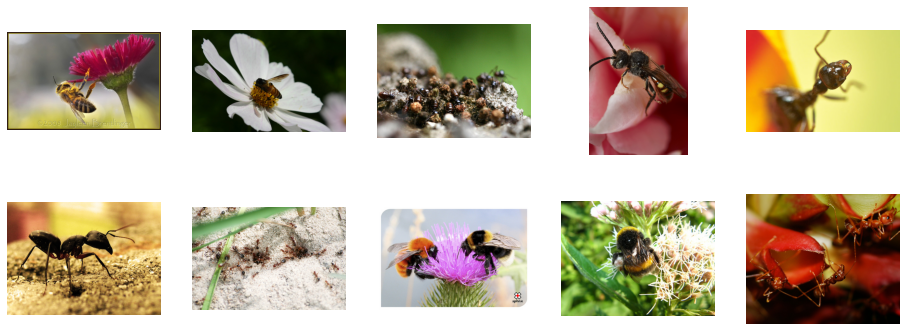

In [ ]:
# show some images
plt.figure(figsize=(16, 6))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    idx = np.random.randint(0,len(image_datasets['train'].samples))
    image = mpimg.imread(image_datasets['train'].samples[idx][0])
    plt.imshow(image)
    plt.axis('off');

### EXERCISE 1

Since we have very little training data it makes sense to use some data augmentation for training.

Add some data augmentation to the training data transforms.

In [ ]:
# ResNet input size
input_size = (224,224)

# Just normalization
data_transforms = {
    'train': transforms.Compose([
        transforms.Resize(input_size),
        transforms.CenterCrop(input_size),
        transforms.RandomHorizontalFlip(),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
    'val': transforms.Compose([
        transforms.Resize(input_size),
        transforms.CenterCrop(input_size),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
}

print("Initializing Datasets and Dataloaders...")


# Batch size for training (change depending on how much memory you have)
batch_size = 8

# Create training and validation datasets
image_datasets = {x: datasets.ImageFolder(os.path.join(data_dir, x), data_transforms[x]) for x in ['train', 'val']}
# Create training and validation dataloaders
dataloaders_dict = {x: torch.utils.data.DataLoader(image_datasets[x], batch_size=batch_size, shuffle=True, num_workers=2) for x in ['train', 'val']}


Initializing Datasets and Dataloaders...


## Define the training helper function

The ``train_model`` function handles the training and validation of a
given model. As input, it takes a PyTorch model, a dictionary of
dataloaders, a loss function, an optimizer, and a specified number of epochs
to train and validate for.


In [ ]:
def train_model(model, dataloaders, criterion, optimizer, num_epochs=25):
    since = time.time()

    acc_history = {"train": [], "val": []}
    losses = {"train": [], "val": []}

    # we will keep a copy of the best weights so far according to validation accuracy
    best_model_wts = copy.deepcopy(model.state_dict())
    best_acc = 0.0

    for epoch in range(num_epochs):
        print('Epoch {}/{}'.format(epoch, num_epochs - 1))
        print('-' * 10)

        # Each epoch has a training and validation phase
        for phase in ['train', 'val']:
            if phase == 'train':
                model.train()  # Set model to training mode
            else:
                model.eval()   # Set model to evaluate mode

            running_loss = 0.0
            running_corrects = 0

            # Iterate over data.
            for inputs, labels in dataloaders[phase]:
                inputs = inputs.to(device)
                labels = labels.to(device)

                # zero the parameter gradients
                optimizer.zero_grad()

                # forward
                # track history if only in train
                with torch.set_grad_enabled(phase == 'train'):
                    # Get model outputs and calculate loss
                    outputs = model(inputs)
                    loss = criterion(outputs, labels)
                    losses[phase].append(loss.cpu().detach().numpy())

                    _, preds = torch.max(outputs, 1)

                    # backward + optimize only if in training phase
                    if phase == 'train':
                        loss.backward()
                        optimizer.step()

                # statistics
                running_loss += loss.item() * inputs.size(0)
                running_corrects += torch.sum(preds == labels.data)

            epoch_loss = running_loss / len(dataloaders[phase].dataset)
            epoch_acc = running_corrects.double() / len(dataloaders[phase].dataset)

            print('{} Loss: {:.4f} Acc: {:.4f}'.format(phase, epoch_loss, epoch_acc))

            # deep copy the model
            if phase == 'val' and epoch_acc > best_acc:
                best_acc = epoch_acc
                best_model_wts = copy.deepcopy(model.state_dict())
            
            acc_history[phase].append(epoch_acc)

        print()

    time_elapsed = time.time() - since
    
    print('Training complete in {:.0f}m {:.0f}s'.format(time_elapsed // 60, time_elapsed % 60))
    print('Best val Acc: {:4f}'.format(best_acc))

    # load best model weights
    model.load_state_dict(best_model_wts)
    return model, acc_history, losses

## Initialize the ResNet model

We will use the Resnet18 model (the smaller one), as our dataset is small and only has two classes. When we print the model, we see that the last layer is a fully connected layer as shown below:


   `(fc): Linear(in_features=512, out_features=1000, bias=True)`



In [ ]:
def initialize_model():
    # Resnet18  
    model = models.resnet18()
    
    input_size = 224 # default input size for ResNet

    return model, input_size



# Initialize the model
model, input_size = initialize_model()

# Print the model we just instantiated
print(model)

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

### EXERCISE 2

Modify the function `initialize_model` so it reinitializes ``model.fc`` to be a Linear layer with 512 input features and 2 output features.


In [ ]:
def initialize_model(num_classes):
    # Resnet18 
    model = models.resnet18()
    num_features = model.fc.in_features # 512

    model.fc = torch.nn.Linear(in_features = num_features, out_features = num_classes)
    
    input_size = 224
        
    return model, input_size


# Number of classes in the dataset
num_classes = 2

# Initialize the model
model, input_size = initialize_model(num_classes)

# Print the model we just instantiated
print(model)


ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

### Run Training and Validation Step

Let's start by training the model from scratch. What do you think will happen?


In [ ]:
# Send the model to GPU
model = model.to(device)

# Setup the loss fxn
criterion = nn.CrossEntropyLoss()

# Number of epochs to train for 
num_epochs = 15

optimizer_ft = optim.Adam(model.parameters(), lr=0.001)

# Train and evaluate
model_scratch, hist_scratch, losses_scratch = train_model(model, dataloaders_dict, criterion, optimizer_ft, num_epochs=num_epochs)

Epoch 0/14
----------
train Loss: 0.9227 Acc: 0.5410
val Loss: 0.9920 Acc: 0.6405

Epoch 1/14
----------
train Loss: 0.6843 Acc: 0.5984
val Loss: 1.0000 Acc: 0.5098

Epoch 2/14
----------
train Loss: 0.7700 Acc: 0.5902
val Loss: 0.7362 Acc: 0.5425

Epoch 3/14
----------
train Loss: 0.7153 Acc: 0.5738
val Loss: 2.7246 Acc: 0.4902

Epoch 4/14
----------
train Loss: 0.6745 Acc: 0.6189
val Loss: 0.7872 Acc: 0.6078

Epoch 5/14
----------
train Loss: 0.6235 Acc: 0.6598
val Loss: 0.8033 Acc: 0.6667

Epoch 6/14
----------
train Loss: 0.6234 Acc: 0.6311
val Loss: 0.7074 Acc: 0.6405

Epoch 7/14
----------
train Loss: 0.6365 Acc: 0.6516
val Loss: 0.6241 Acc: 0.6078

Epoch 8/14
----------
train Loss: 0.6185 Acc: 0.6721
val Loss: 0.8857 Acc: 0.5621

Epoch 9/14
----------
train Loss: 0.6140 Acc: 0.6803
val Loss: 0.7856 Acc: 0.6667

Epoch 10/14
----------
train Loss: 0.6768 Acc: 0.6066
val Loss: 0.6591 Acc: 0.6667

Epoch 11/14
----------
train Loss: 0.6096 Acc: 0.6762
val Loss: 0.8747 Acc: 0.6928

Ep

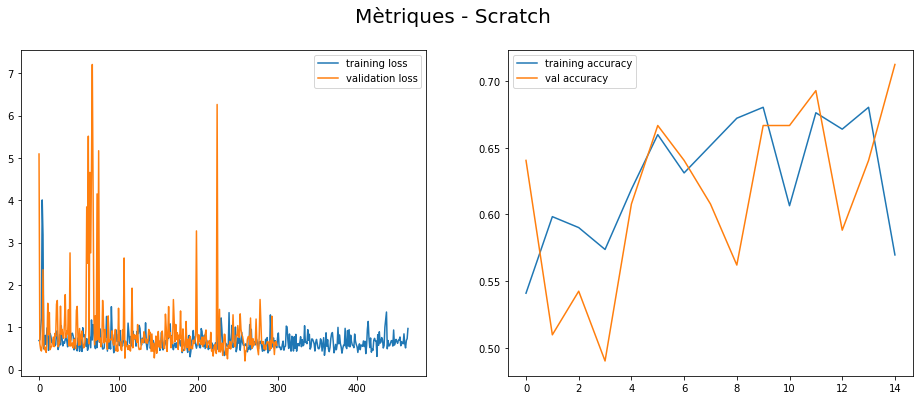

In [ ]:
# plot the losses and accuracies
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

ax1.plot(losses_scratch["train"], label="training loss")
ax1.plot(losses_scratch["val"], label="validation loss")
ax1.legend()

ax2.plot(hist_scratch["train"],label="training accuracy")
ax2.plot(hist_scratch["val"],label="val accuracy")
ax2.legend()

fig.suptitle("Mètriques - Scratch", fontsize = 20)
plt.show()   

Training from scratch with only 100 examples per class does not allow the network to perform very well in this task. It reaches at most 70% accuracy, and the loss seems not descreassing anymore.

## Preparing the model for finetuning and feature extraction

In order to load the the pretrained weights for the ResNet model we must change a bit the function `initialize model`. 

Moreover, depending if we want to do finetuning (update all parameters) or if we want to do feature extraction (update only the last fully connected layer), we must specify wich parameter to update.

The following helper function sets the ``.requires_grad`` attribute of the parameters in the model. This is especially useful when you want to freeze part of your model, as the parameters with ``.requires_grad=False`` will not be updated during training.


In [ ]:
def set_parameter_requires_grad(model, feature_extracting):
    if feature_extracting:
        for param in model.parameters():
            param.requires_grad = False

CAUTION: you must call this function in the correct place, otherwise you will have no learnable parameters in your model.

In [ ]:
def initialize_model(num_classes, feature_extract, use_pretrained):
    model = models.resnet18(pretrained = use_pretrained, progress = True)
    set_parameter_requires_grad(model, feature_extract)

    num_features = model.fc.in_features
    model.fc = torch.nn.Linear(in_features = num_features, out_features = num_classes)
    
    input_size = 224
        
    return model, input_size

In [ ]:
# Flags
num_classes = 2
feature_extract = True
use_pretrained = True 

# Initialize the model
model, input_size = initialize_model(num_classes, feature_extract, use_pretrained)
model = model.to(device)

### Create the Optimizer


The final step for finetuning and feature extracting is to create an optimizer that only updates the
desired parameters. Recall that after loading the pretrained model, but before reshaping, if ``feature_extract=True`` we manually set all of the parameter’s ``.requires_grad`` attributes to False. Then the reinitialized layer’s parameters have ``.requires_grad=True`` by default. So now we know that *all parameters that have ``.requires_grad=True`` should be optimized. Next, we make a list of such parameters and input this list to the Adam algorithm constructor.



In [ ]:
# Gather the parameters to be optimized/updated in this run. If we are
#  finetuning we will be updating all parameters. However, if we are 
#  doing feature extract method, we will only update the parameters
#  that we have just initialized, i.e. the parameters with requires_grad
#  is True.

params_to_update = model.parameters()
print("Params to learn:")
if feature_extract:
    params_to_update = []
    for name,param in model.named_parameters():
        if param.requires_grad == True:
            params_to_update.append(param)
            print("\t",name)
else:
    for name,param in model.named_parameters():
        if param.requires_grad == True:
            print("\t",name)

# Observe that all parameters are being optimized
optimizer_ft = optim.Adam(params_to_update, lr=0.001)

# Setup the loss fxn
criterion = nn.CrossEntropyLoss()

Params to learn:
	 fc.weight
	 fc.bias


# HOMEWORK


A) Train the model with feature extraction for 15 epochs. This is, you must freeze all parameters except the last fully connected layer. Plot the train/val losses and accuracies.

In [ ]:
# Flags - Feature Extraction
num_classes = 2
feature_extract = True
use_pretrained = True 

# Initialize the model
model, input_size = initialize_model(num_classes, feature_extract, use_pretrained)
model = model.to(device)

params_to_update = model.parameters()
print("Params to learn:")
if feature_extract:
    params_to_update = []
    for name,param in model.named_parameters():
        if param.requires_grad == True:
            params_to_update.append(param)
            print("\t",name)
else:
    for name,param in model.named_parameters():
        if param.requires_grad == True:
            print("\t",name)

# Observe that all parameters are being optimized
optimizer_ft = optim.Adam(params_to_update, lr=0.001)

# Setup the loss fxn
criterion = nn.CrossEntropyLoss()

# Train and evaluate
model_ft, hist_ft, losses_ft = train_model(model, dataloaders_dict, criterion, optimizer_ft, num_epochs = 15)

Epoch 0/14
----------
train Loss: 0.5995 Acc: 0.6639
val Loss: 0.4941 Acc: 0.7908

Epoch 1/14
----------
train Loss: 0.4286 Acc: 0.8361
val Loss: 0.3191 Acc: 0.8758

Epoch 2/14
----------
train Loss: 0.3904 Acc: 0.8238
val Loss: 0.2568 Acc: 0.9020

Epoch 3/14
----------
train Loss: 0.3582 Acc: 0.8443
val Loss: 0.2461 Acc: 0.9020

Epoch 4/14
----------
train Loss: 0.3441 Acc: 0.8484
val Loss: 0.2917 Acc: 0.8889

Epoch 5/14
----------
train Loss: 0.2781 Acc: 0.8811
val Loss: 0.2487 Acc: 0.9020

Epoch 6/14
----------
train Loss: 0.2929 Acc: 0.8730
val Loss: 0.2746 Acc: 0.8824

Epoch 7/14
----------
train Loss: 0.2624 Acc: 0.9016
val Loss: 0.2104 Acc: 0.9020

Epoch 8/14
----------
train Loss: 0.3520 Acc: 0.8525
val Loss: 0.2724 Acc: 0.8758

Epoch 9/14
----------
train Loss: 0.2821 Acc: 0.8893
val Loss: 0.2714 Acc: 0.8824

Epoch 10/14
----------
train Loss: 0.2960 Acc: 0.8893
val Loss: 0.1897 Acc: 0.9216

Epoch 11/14
----------
train Loss: 0.2473 Acc: 0.9016
val Loss: 0.1924 Acc: 0.9281

Ep

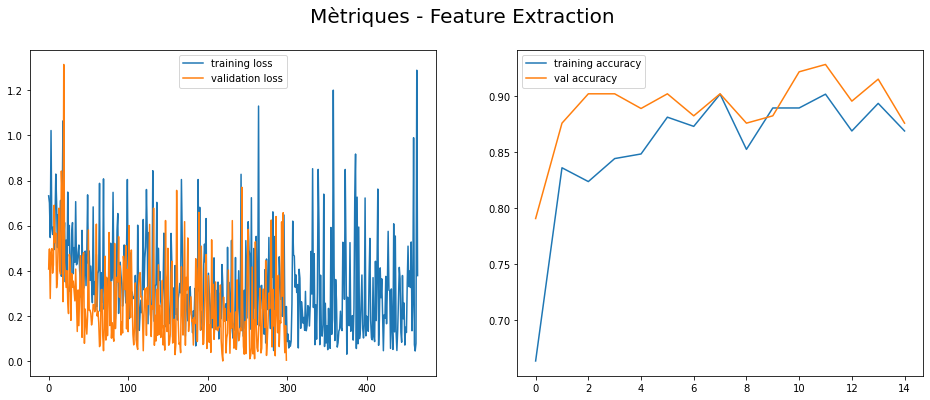

In [ ]:
# plot the losses and accuracies
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

ax1.plot(losses_ft["train"], label="training loss")
ax1.plot(losses_ft["val"], label="validation loss")
ax1.legend()

ax2.plot(hist_ft["train"],label="training accuracy")
ax2.plot(hist_ft["val"],label="val accuracy")
ax2.legend()

fig.suptitle("Mètriques - Feature Extraction", fontsize = 20)
plt.show()   

> Veiem que a través del *feature extraction* el model es capaz d'arribar al 92% d'accuracy en tans sols 8 minuts i 14 epochs. Això es perquè la nova tasca que fa el model es molt senzilla (classificar entre dues classes).

> Aprofitant els pesos amb els que s'ha entrenat el model per dies sobre Imagenet podem adaptar el model a fer aquesta nova tasca molt més senzilla.

B) Train the model finetuning all the parameters for 15 epochs. Plot the train/val losses and accuracies. 

In [ ]:
# Finetuning 
feature_extract = False
use_pretrained = True

model_finetuning, input_size = initialize_model(num_classes, feature_extract, use_pretrained)
model_finetuning = model_finetuning.to(device)

In [ ]:
# Gather the parameters to be optimized/updated in this run. If we are
#  finetuning we will be updating all parameters. However, if we are 
#  doing feature extract method, we will only update the parameters
#  that we have just initialized, i.e. the parameters with requires_grad
#  is True.

params_to_update = model_finetuning.parameters()
print("Params to learn:")
if feature_extract:
    params_to_update = []
    for name,param in model_finetuning.named_parameters():
        if param.requires_grad == True:
            params_to_update.append(param)
            print("\t",name)
else:
    for name,param in model_finetuning.named_parameters():
        if param.requires_grad == True:
            print("\t",name)

# Observe that all parameters are being optimized
optimizer_ft = optim.Adam(params_to_update, lr=0.001)

Params to learn:
	 conv1.weight
	 bn1.weight
	 bn1.bias
	 layer1.0.conv1.weight
	 layer1.0.bn1.weight
	 layer1.0.bn1.bias
	 layer1.0.conv2.weight
	 layer1.0.bn2.weight
	 layer1.0.bn2.bias
	 layer1.1.conv1.weight
	 layer1.1.bn1.weight
	 layer1.1.bn1.bias
	 layer1.1.conv2.weight
	 layer1.1.bn2.weight
	 layer1.1.bn2.bias
	 layer2.0.conv1.weight
	 layer2.0.bn1.weight
	 layer2.0.bn1.bias
	 layer2.0.conv2.weight
	 layer2.0.bn2.weight
	 layer2.0.bn2.bias
	 layer2.0.downsample.0.weight
	 layer2.0.downsample.1.weight
	 layer2.0.downsample.1.bias
	 layer2.1.conv1.weight
	 layer2.1.bn1.weight
	 layer2.1.bn1.bias
	 layer2.1.conv2.weight
	 layer2.1.bn2.weight
	 layer2.1.bn2.bias
	 layer3.0.conv1.weight
	 layer3.0.bn1.weight
	 layer3.0.bn1.bias
	 layer3.0.conv2.weight
	 layer3.0.bn2.weight
	 layer3.0.bn2.bias
	 layer3.0.downsample.0.weight
	 layer3.0.downsample.1.weight
	 layer3.0.downsample.1.bias
	 layer3.1.conv1.weight
	 layer3.1.bn1.weight
	 layer3.1.bn1.bias
	 layer3.1.conv2.weight
	 layer3.1.b

In [ ]:
model_finetuning, hist_finetuning, losses_finetuning = train_model(model_finetuning, dataloaders_dict, criterion, optimizer_ft, num_epochs = 15)

Epoch 0/14
----------
train Loss: 1.0881 Acc: 0.6475
val Loss: 2.8098 Acc: 0.6471

Epoch 1/14
----------
train Loss: 0.6958 Acc: 0.6230
val Loss: 0.7478 Acc: 0.6405

Epoch 2/14
----------
train Loss: 0.6710 Acc: 0.6025
val Loss: 0.5738 Acc: 0.6471

Epoch 3/14
----------
train Loss: 0.5901 Acc: 0.6557
val Loss: 2.4356 Acc: 0.6928

Epoch 4/14
----------
train Loss: 0.6129 Acc: 0.6844
val Loss: 0.6470 Acc: 0.6078

Epoch 5/14
----------
train Loss: 0.6043 Acc: 0.6844
val Loss: 0.5598 Acc: 0.7778

Epoch 6/14
----------
train Loss: 0.5460 Acc: 0.7336
val Loss: 1.3603 Acc: 0.5490

Epoch 7/14
----------
train Loss: 0.5871 Acc: 0.7008
val Loss: 3.3786 Acc: 0.4575

Epoch 8/14
----------
train Loss: 0.6212 Acc: 0.6885
val Loss: 1.4013 Acc: 0.6209

Epoch 9/14
----------
train Loss: 0.5692 Acc: 0.6762
val Loss: 0.7829 Acc: 0.7190

Epoch 10/14
----------
train Loss: 0.4830 Acc: 0.7705
val Loss: 0.5637 Acc: 0.8105

Epoch 11/14
----------
train Loss: 0.6194 Acc: 0.7008
val Loss: 1.3006 Acc: 0.5556

Ep

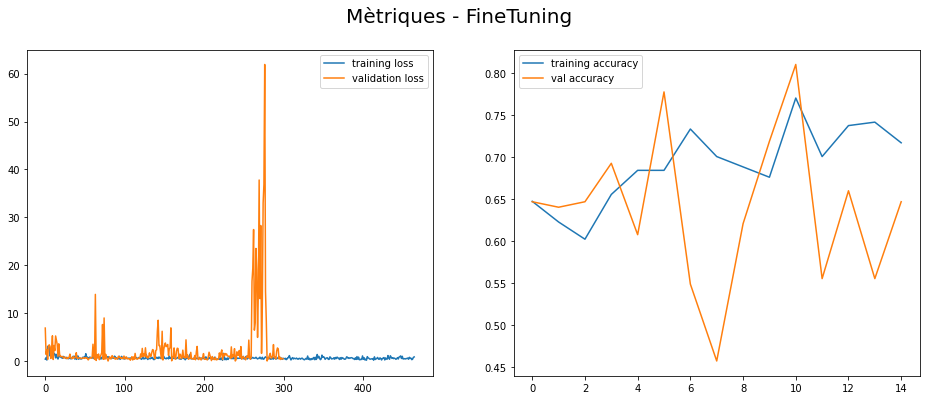

In [ ]:
# plot the losses and accuracies
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

ax1.plot(losses_finetuning["train"], label="training loss")
ax1.plot(losses_finetuning["val"], label="validation loss")
ax1.legend()

ax2.plot(hist_finetuning["train"],label="training accuracy")
ax2.plot(hist_finetuning["val"],label="val accuracy")
ax2.legend()

fig.suptitle("Mètriques - FineTuning", fontsize = 20)
plt.show()   

> En aquest cas veiem que el model és molt sorrollos ja que estem utilitzant un *batch size* molt petit. A més, estem aprenent nosaltres els pesos, en lloc de utilitzar els pesos entrenats sobre Imagenet del model.

> A més, el fet d'apendre nosaltres els pesos fa que el entrenament tardi notablement més que amb *feature extraction*, en aquest cas ha tardat x2,369 més de temps i ha obtingut 10% menys d'accuracy.

> Veient la gràfica, jo disminuiría el *lr* i augmentaría el número d'epochs.


C) Plot the  train/val losses and accuracies of all three approaches: training from scratch, finetunning, and festure extraction. To make easier visualization and comparison, use four `plt.subplots`: one for training loss, one for val loss, one for training accuracy, and one for val accuracy.

**IMPORTANT: Make the plot self-explanatory: use legends and titles for each subplot, and a main title for the whole figure.**

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:33: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.


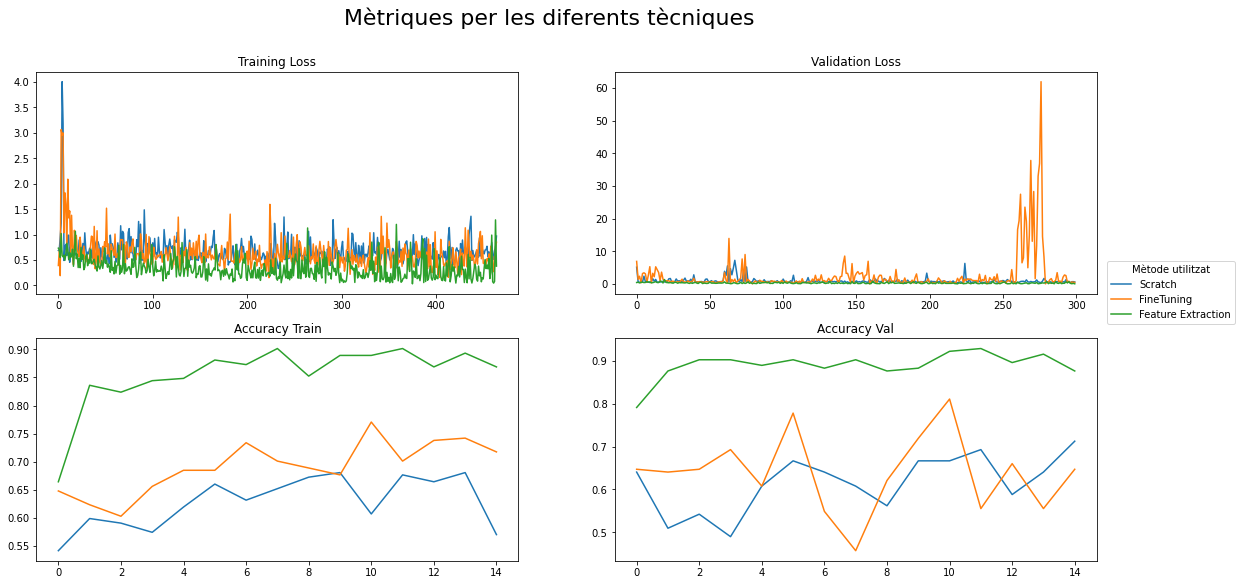

In [ ]:
fig, axs = plt.subplots(2, 2, figsize=(19, 9))

# Losses
axs[0, 0].plot(losses_scratch["train"])
axs[0, 0].plot(losses_finetuning["train"])
axs[0, 0].plot(losses_ft["train"])
axs[0, 0].set_title("Training Loss")

axs[0, 1].plot(losses_scratch["val"])
axs[0, 1].plot(losses_finetuning["val"])
axs[0, 1].plot(losses_ft["val"])
axs[0, 1].set_title("Validation Loss")

# Accuracy
axs[1, 0].plot(hist_scratch["train"])
axs[1, 0].plot(hist_finetuning["train"])
axs[1, 0].plot(hist_ft["train"])
axs[1, 0].set_title("Accuracy Train")

axs[1, 1].plot(hist_scratch["val"])
axs[1, 1].plot(hist_finetuning["val"])
axs[1, 1].plot(hist_ft["val"])
axs[1, 1].set_title("Accuracy Val")

# Shared legend
line_labels = ["Scratch", "FineTuning", "Feature Extraction"]
# Create the legend
fig.legend(
           axs,     # The line objects
           labels=line_labels,   # The labels for each line
           loc="center right",   # Position of legend
           borderaxespad=0.3,    # Small spacing around legend box
           title="Mètode utilitzat"  # Title for the legend
           )
fig.suptitle("Mètriques per les diferents tècniques", fontsize = 22)
plt.show()

> El tret més destacable de les gràfiques loss és que en la *validation loss* veiem que el mètode *finetuning* és molt sorrollos pel que ja hem esmentat. En general, veiem que el mètode *feature extraction* és el que manté un loss més baix tot i que podriem probar a reduir el lr per intentar minimitzar el sorroll.

> Quant al *accuracy*, queda bastant clar que el millor mètode és *feature extraction*.

D) Train the same model for a different dataset (MIT Scenes) using the three training strategies: from scratch, finetunning, and feature extraction. 

The URL of the dataset is the following:

https://xnap-datasets.s3.us-east-2.amazonaws.com/MIT_scenes.zip

The dataset contains scene images of 8 classes: coast, forest, highway, inside_city, mountain, open_country, street, and tallbuilding. The number of training images per class varies between 187 and 295. 


In [ ]:
# download the dataset
url = 'https://xnap-datasets.s3.us-east-2.amazonaws.com/MIT_scenes.zip'
datasets.utils.download_and_extract_archive(url, './data')

data_dir = "./data/MIT_scenes/"

# ResNet input size
input_size = (224,224)

# Just normalization
data_transforms = {
    'train': transforms.Compose([
        transforms.Resize(input_size),
        transforms.CenterCrop(input_size),
        transforms.RandomHorizontalFlip(),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
    'val': transforms.Compose([
        transforms.Resize(input_size),
        transforms.CenterCrop(input_size),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
}

print("Initializing Datasets and Dataloaders...")


# Batch size for training (change depending on how much memory you have)
batch_size = 8

# Create training and validation datasets
image_datasets = {x: datasets.ImageFolder(os.path.join(data_dir, x), data_transforms[x]) for x in ['train', 'val']}
# Create training and validation dataloaders
dataloaders_dict = {x: torch.utils.data.DataLoader(image_datasets[x], batch_size=batch_size, shuffle=True, num_workers=2) for x in ['train', 'val']}

  0%|          | 0/127093454 [00:00<?, ?it/s]

Extracting ./data/MIT_scenes.zip to ./data
Initializing Datasets and Dataloaders...



D.1) Visualize some of the images


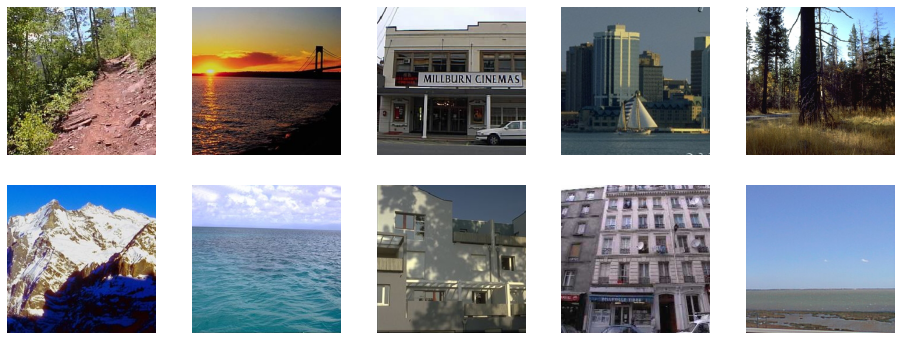

In [ ]:
# show some images
plt.figure(figsize=(16, 6))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    idx = np.random.randint(0,len(image_datasets['train'].samples))
    image = mpimg.imread(image_datasets['train'].samples[idx][0])
    plt.imshow(image)
    plt.axis('off');

D.2) Train the ResNet-18 model for 40 epochs using the three training strategies: from scratch, finetunning, and feature extraction. Each training process should take approx. 10 minutes on colab.

In [ ]:
num_classes = 8
num_epochs = 40

# Scratch
feature_extract = False
use_pretrained = False

model_scratch, input_size = initialize_model(num_classes, feature_extract, use_pretrained)
model_scratch = model_scratch.to(device)

# Observe that all parameters are being optimized
optimizer_ft = optim.Adam(model_scratch.parameters(), lr=0.001)
criterion = nn.CrossEntropyLoss()

since_scratch = time.time()
model_scratch, hist_scratch, losses_scratch  = train_model(model_scratch, dataloaders_dict, criterion, optimizer_ft, num_epochs = num_epochs)
time_elapsed_scratch = time.time() - since_scratch


Epoch 0/39
----------
train Loss: 1.6832 Acc: 0.3897
val Loss: 1.3011 Acc: 0.4957

Epoch 1/39
----------
train Loss: 1.2435 Acc: 0.5593
val Loss: 1.0660 Acc: 0.6233

Epoch 2/39
----------
train Loss: 1.0609 Acc: 0.6183
val Loss: 0.7917 Acc: 0.7026

Epoch 3/39
----------
train Loss: 0.9409 Acc: 0.6858
val Loss: 1.2006 Acc: 0.5898

Epoch 4/39
----------
train Loss: 0.8199 Acc: 0.7113
val Loss: 0.9854 Acc: 0.6766

Epoch 5/39
----------
train Loss: 0.7748 Acc: 0.7193
val Loss: 0.6026 Acc: 0.7881

Epoch 6/39
----------
train Loss: 0.7391 Acc: 0.7448
val Loss: 0.6649 Acc: 0.7497

Epoch 7/39
----------
train Loss: 0.6990 Acc: 0.7629
val Loss: 0.6365 Acc: 0.7708

Epoch 8/39
----------
train Loss: 0.6395 Acc: 0.7900
val Loss: 0.7212 Acc: 0.7559

Epoch 9/39
----------
train Loss: 0.5778 Acc: 0.8086
val Loss: 0.4806 Acc: 0.8377

Epoch 10/39
----------
train Loss: 0.5457 Acc: 0.8177
val Loss: 0.5913 Acc: 0.8042

Epoch 11/39
----------
train Loss: 0.5108 Acc: 0.8182
val Loss: 0.5949 Acc: 0.8055

Ep

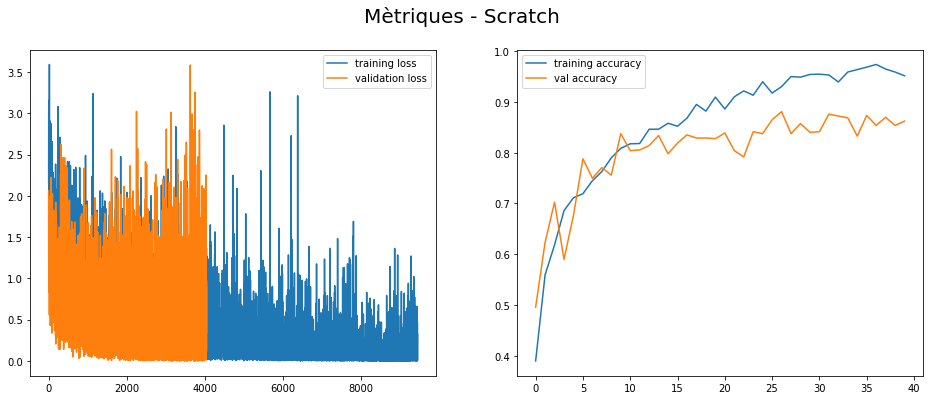

In [ ]:
# plot the losses and accuracies
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

ax1.plot(losses_scratch["train"], label="training loss")
ax1.plot(losses_scratch["val"], label="validation loss")
ax1.legend()

hist_scratch_train = torch.tensor(hist_scratch["train"], device = 'cpu')
hist_scratch_val = torch.tensor(hist_scratch["val"], device = 'cpu')
ax2.plot(hist_scratch_train, label="training accuracy")
ax2.plot(hist_scratch_val, label="val accuracy")
ax2.legend()

fig.suptitle("Mètriques - Scratch", fontsize = 20)
plt.show()   

> El més destacable és que el model pot tenir una mica d'**overfitting**.

In [ ]:
# Finetuning 
feature_extract = False
use_pretrained = True

model_finetuning, input_size = initialize_model(num_classes, feature_extract, use_pretrained)
model_finetuning = model_finetuning.to(device)

print("Params to learn:")
params_to_update = model_finetuning.parameters()
for name,param in model_finetuning.named_parameters():
        if param.requires_grad == True:
            print("\t",name)

print("\n")
# Observe that all parameters are being optimized
optimizer_ft = optim.Adam(params_to_update, lr=0.001)
since_finetuning = time.time()
model_finetuning, hist_finetuning, losses_finetuning = train_model(model_finetuning, dataloaders_dict, criterion, optimizer_ft, num_epochs = num_epochs)
time_elapsed_finetuning = time.time() - since_finetuning

Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth


  0%|          | 0.00/44.7M [00:00<?, ?B/s]

Params to learn:
	 conv1.weight
	 bn1.weight
	 bn1.bias
	 layer1.0.conv1.weight
	 layer1.0.bn1.weight
	 layer1.0.bn1.bias
	 layer1.0.conv2.weight
	 layer1.0.bn2.weight
	 layer1.0.bn2.bias
	 layer1.1.conv1.weight
	 layer1.1.bn1.weight
	 layer1.1.bn1.bias
	 layer1.1.conv2.weight
	 layer1.1.bn2.weight
	 layer1.1.bn2.bias
	 layer2.0.conv1.weight
	 layer2.0.bn1.weight
	 layer2.0.bn1.bias
	 layer2.0.conv2.weight
	 layer2.0.bn2.weight
	 layer2.0.bn2.bias
	 layer2.0.downsample.0.weight
	 layer2.0.downsample.1.weight
	 layer2.0.downsample.1.bias
	 layer2.1.conv1.weight
	 layer2.1.bn1.weight
	 layer2.1.bn1.bias
	 layer2.1.conv2.weight
	 layer2.1.bn2.weight
	 layer2.1.bn2.bias
	 layer3.0.conv1.weight
	 layer3.0.bn1.weight
	 layer3.0.bn1.bias
	 layer3.0.conv2.weight
	 layer3.0.bn2.weight
	 layer3.0.bn2.bias
	 layer3.0.downsample.0.weight
	 layer3.0.downsample.1.weight
	 layer3.0.downsample.1.bias
	 layer3.1.conv1.weight
	 layer3.1.bn1.weight
	 layer3.1.bn1.bias
	 layer3.1.conv2.weight
	 layer3.1.b

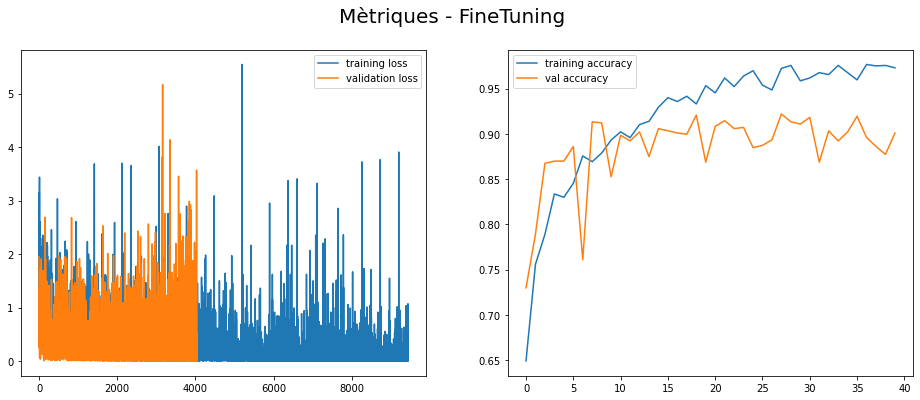

In [ ]:
# plot the losses and accuracies
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

ax1.plot(losses_finetuning["train"], label="training loss")
ax1.plot(losses_finetuning["val"], label="validation loss")
ax1.legend()


hist_finetuning_train = torch.tensor(hist_finetuning["train"], device = 'cpu')
hist_finetuning_val = torch.tensor(hist_finetuning["val"], device = 'cpu')
ax2.plot(hist_finetuning_train,label="training accuracy")
ax2.plot(hist_finetuning_val,label="val accuracy")
ax2.legend()

fig.suptitle("Mètriques - FineTuning", fontsize = 20)
plt.show()   

> Aquest model també pateix una mica d'**overfitting**.

In [ ]:
# Feature Extracting 
feature_extract = True
use_pretrained = True
model_ft, input_size = initialize_model(num_classes, feature_extract, use_pretrained)
model_ft = model_ft.to(device)

print("Params to learn:")
params_to_update = []
for name,param in model_ft.named_parameters():
    if param.requires_grad == True:
        params_to_update.append(param)
        print("\t",name)

print("\n")
# Observe that all parameters are being optimized
optimizer_ft = optim.Adam(params_to_update, lr=0.001)
since_ft = time.time()
model_ft, hist_ft, losses_ft = train_model(model_ft, dataloaders_dict, criterion, optimizer_ft, num_epochs = num_epochs)
time_elapsed_ft = time.time() - since_ft

Params to learn:
	 fc.weight
	 fc.bias


Epoch 0/39
----------
train Loss: 1.0796 Acc: 0.6528
val Loss: 0.4452 Acc: 0.8736

Epoch 1/39
----------
train Loss: 0.5253 Acc: 0.8437
val Loss: 0.3636 Acc: 0.8897

Epoch 2/39
----------
train Loss: 0.4644 Acc: 0.8506
val Loss: 0.2932 Acc: 0.9083

Epoch 3/39
----------
train Loss: 0.4236 Acc: 0.8543
val Loss: 0.2337 Acc: 0.9219

Epoch 4/39
----------
train Loss: 0.3719 Acc: 0.8777
val Loss: 0.2323 Acc: 0.9232

Epoch 5/39
----------
train Loss: 0.3578 Acc: 0.8825
val Loss: 0.2336 Acc: 0.9232

Epoch 6/39
----------
train Loss: 0.3130 Acc: 0.8942
val Loss: 0.2195 Acc: 0.9281

Epoch 7/39
----------
train Loss: 0.3317 Acc: 0.8926
val Loss: 0.2166 Acc: 0.9356

Epoch 8/39
----------
train Loss: 0.3288 Acc: 0.8905
val Loss: 0.2037 Acc: 0.9269

Epoch 9/39
----------
train Loss: 0.2999 Acc: 0.8969
val Loss: 0.2076 Acc: 0.9269

Epoch 10/39
----------
train Loss: 0.3178 Acc: 0.8878
val Loss: 0.2646 Acc: 0.9046

Epoch 11/39
----------
train Loss: 0.2889 Acc

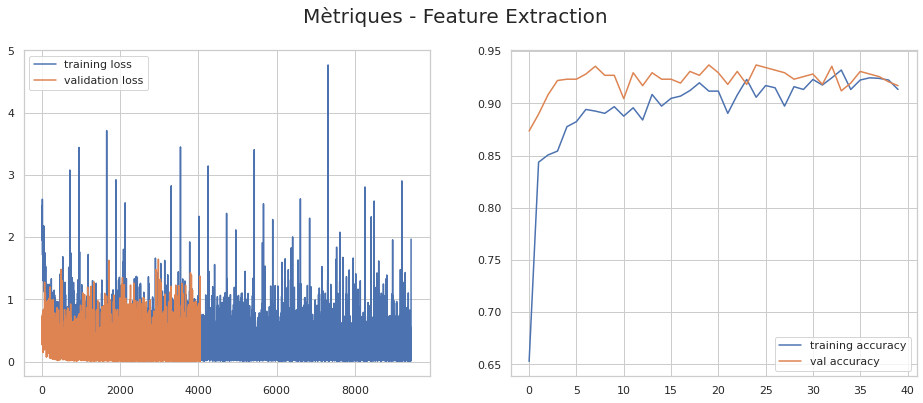

In [ ]:
# plot the losses and accuracies
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

ax1.plot(losses_ft["train"], label="training loss")
ax1.plot(losses_ft["val"], label="validation loss")
ax1.legend()

hist_ft_train = torch.tensor(hist_ft["train"], device = 'cpu')
hist_ft_val = torch.tensor(hist_ft["val"], device = 'cpu')
ax2.plot(hist_ft_train,label="training accuracy")
ax2.plot(hist_ft_val,label="val accuracy")
ax2.legend()

fig.suptitle("Mètriques - Feature Extraction", fontsize = 20)
plt.show()   

> Amb aquest model no veiem el mateix problema que els anterior, ho fa en un temps menor i obté millors rseultats.

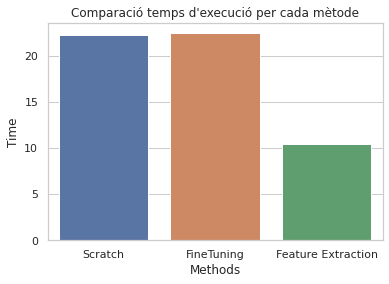

In [ ]:
sns.set_theme(style = "whitegrid")
df_time = pd.DataFrame({"Methods":
                                ["Scratch",
                                 "FineTuning",
                                 "Feature Extraction"],
                        
                        "Time": [time_elapsed_scratch/60, 
                                 time_elapsed_finetuning/60,
                                 time_elapsed_ft/60]
                        })
sns.barplot(x = "Methods", y = "Time", data = df_time).set(title = "Comparació temps d'execució per cada mètode")
plt.show()

> Veiem que hi ha una gran diferència de temps respecte si hem d'apendre els pesos o agafem els que s'han entrenat sobre Imagenet.

D.3) Plot the train/val losses and accuracies of all of them. Again, to make easier visualization and comparison, use four plt.subplots: one for training loss, one for val loss, one for training accuracy, and one for val accuracy.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:33: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.


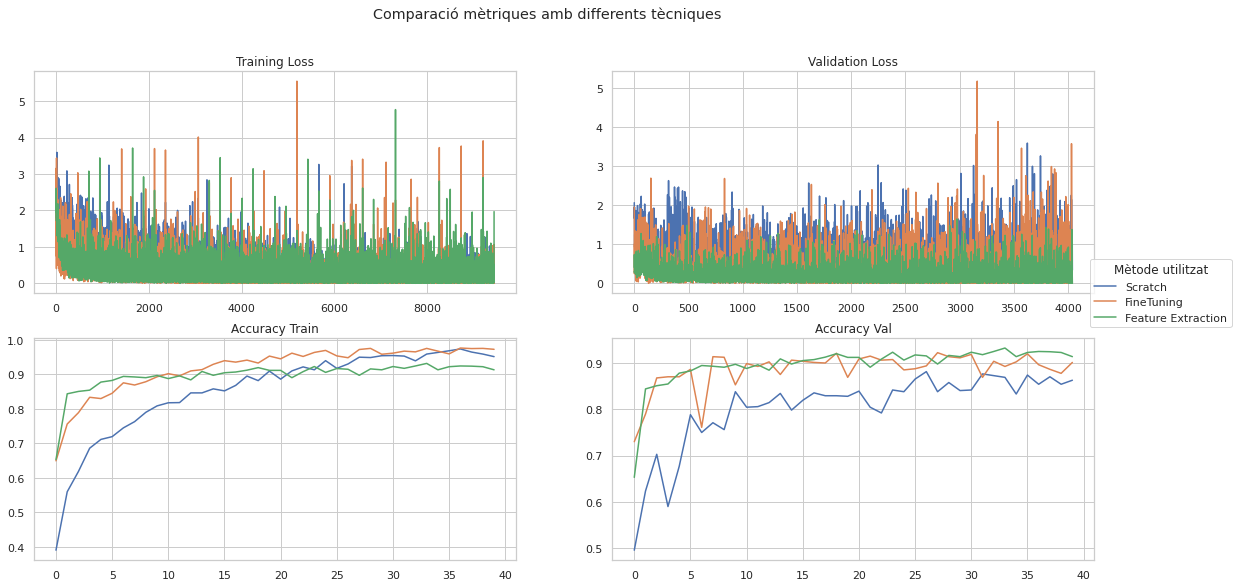

In [ ]:
fig, axs = plt.subplots(2, 2, figsize=(19, 9))

# Losses
axs[0, 0].plot(losses_scratch["train"])
axs[0, 0].plot(losses_finetuning["train"])
axs[0, 0].plot(losses_ft["train"])
axs[0, 0].set_title("Training Loss")

axs[0, 1].plot(losses_scratch["val"])
axs[0, 1].plot(losses_finetuning["val"])
axs[0, 1].plot(losses_ft["val"])
axs[0, 1].set_title("Validation Loss")

# Accuracy
axs[1, 0].plot(hist_scratch_train)
axs[1, 0].plot(hist_finetuning_train)
axs[1, 0].plot(hist_ft_train)
axs[1, 0].set_title("Accuracy Train")

axs[1, 1].plot(hist_scratch_val)
axs[1, 1].plot(hist_finetuning_val)
axs[1, 1].plot(hist_ft_val)
axs[1, 1].set_title("Accuracy Val")

# Shared legend
line_labels = ["Scratch", "FineTuning", "Feature Extraction"]
# Create the legend
fig.legend(
           axs,     # The line objects
           labels=line_labels,   # The labels for each line
           loc="center right",   # Position of legend
           borderaxespad=0.3,    # Small spacing around legend box
           title="Mètode utilitzat"  # Title for the legend
           )
fig.suptitle("Comparació mètriques amb differents tècniques")
plt.show()

> Veiem que sobre el conjunt de train els models pateixen una mica d'overfitting obtenint accuracies properes al 100%. 

> Quan a la funció loss, la mñes reduida torna a ser amb el mètode *feature extraction*.

> Per temps i resultats a partir d'ara farem les proves amb *feature extraction* ja que amb les condicions d'aquesta pràctica, sembla ser el mètode que millor funciona.

E) Choose a diferent CNN architecture from the [`torchvision models`](https://pytorch.org/docs/stable/torchvision/models.html) module and try to beat the best model obtained in the previous exercise. You can also change some hyper-parameters if you think it is going to help (batch size, learning rate, optimizer, etc.). Justify your choice, even if you don't get better accuracy explain why you thought it was promising. 

> En aquest cas he seleccionat sis models per provar, entre aquests hi han models molt grans i models més petits. A priori, com la nostra tasca no és excesivament díficil (classificar entre 8 classes) crec que xarxes molt complexes seràn massa grans i costoses per aquest problema de classificació.

> Crec que les que millor poden funcionar son GoogleNet, Alexnet i SqueezeNet. Les dues últimes son bastant semblants en quant a resultat pero sobre la teoŕia Squeezenet consegueix fer-ho amb molts menys paràmetres i complexitat. Quant a GoogleNet, potser és una xarxa massa profunda per aquesta tasca, anem a veure.

In [ ]:
def initialize_model(model_name, num_classes, feature_extract, use_pretrained, show_progress = True):

    if model_name == "vgg19_bn":
        # VGG 19-layer model (configuration ‘E’) with batch normalization 
        model = models.vgg19_bn(pretrained = use_pretrained, progress = show_progress)
        set_parameter_requires_grad(model, feature_extract)

        model.classifier[6] = nn.Linear(4096, num_classes)
        input_size = 224
      
    
    elif model_name == "GoogleNet":
        # GoogLeNet (Inception v1) model architecture from “Going Deeper with Convolutions”.
        model = models.googlenet(pretrained = use_pretrained, progress = show_progress)
        set_parameter_requires_grad(model, feature_extract)

        num_features = model.fc.in_features
        model.fc = torch.nn.Linear(in_features = num_features, out_features = num_classes)
        
        input_size = 224
      
    elif model_name == "resnet101":
        # ResNet-101 model from “Deep Residual Learning for Image Recognition”.
        model = models.resnet101(pretrained = use_pretrained, progress = show_progress)
        set_parameter_requires_grad(model, feature_extract)

        num_features = model.fc.in_features
        model.fc = torch.nn.Linear(in_features = num_features, out_features = num_classes)

        input_size = 224
    
    elif model_name == "alexnet":
        model = models.alexnet(pretrained=use_pretrained, progress = show_progress)
        set_parameter_requires_grad(model, feature_extract)
        num_ftrs = model.classifier[6].in_features
        model.classifier[6] = nn.Linear(num_ftrs, num_classes)

        input_size = 224
    
    elif model_name == "squeezenet":
        model = models.squeezenet1_1(pretrained=use_pretrained, progress = show_progress)
        set_parameter_requires_grad(model, feature_extract)
        model.classifier[1] = nn.Conv2d(512, num_classes, kernel_size=(1,1), stride=(1,1))
        model.num_classes = num_classes

        input_size = 224

    elif model_name == "densenet":
        model = models.densenet121(pretrained=use_pretrained, progress = show_progress)
        set_parameter_requires_grad(model, feature_extract)
        num_ftrs = model.classifier.in_features
        model.classifier = nn.Linear(num_ftrs, num_classes) 

        input_size = 224

    else:
        print("Please select a model of the following list: ['vgg19_bn', 'GoogleNet', 'resnet101', 'alexnet', 'squeezenet' or 'densenet']")

    return model, input_size

In [ ]:
# Flags - Feature Extraction
num_classes = 8
num_epochs = 40
feature_extract = True
use_pretrained = True 

# Initialize the model
vgg19_bn, input_size = initialize_model("vgg19_bn", num_classes, feature_extract, use_pretrained)
vgg19_bn = vgg19_bn.to(device)

print("Params to learn:")
params_to_update = []
for name,param in vgg19_bn.named_parameters():
    if param.requires_grad == True:
        params_to_update.append(param)
        print("\t",name)

print()
optimizer_ft = optim.Adam(params_to_update, lr=0.001)
criterion = nn.CrossEntropyLoss()

since_vgg19_bn = time.time()
model_vgg19_bn, hist_vgg19_bn, losses_vgg19_bn = train_model(vgg19_bn, dataloaders_dict, criterion, optimizer_ft, num_epochs = num_epochs)
time_elapsed_vgg19_bn = time.time() - since_vgg19_bn

Params to learn:
	 classifier.6.weight
	 classifier.6.bias

Epoch 0/39
----------
train Loss: 0.6301 Acc: 0.7820
val Loss: 0.2782 Acc: 0.9058

Epoch 1/39
----------
train Loss: 0.4244 Acc: 0.8432
val Loss: 0.3208 Acc: 0.8860

Epoch 2/39
----------
train Loss: 0.3471 Acc: 0.8767
val Loss: 0.2736 Acc: 0.8971

Epoch 3/39
----------
train Loss: 0.3470 Acc: 0.8745
val Loss: 0.2969 Acc: 0.8959

Epoch 4/39
----------
train Loss: 0.3570 Acc: 0.8804
val Loss: 0.2621 Acc: 0.9071

Epoch 5/39
----------
train Loss: 0.3685 Acc: 0.8676
val Loss: 0.2856 Acc: 0.8971

Epoch 6/39
----------
train Loss: 0.3022 Acc: 0.8915
val Loss: 0.3693 Acc: 0.8810

Epoch 7/39
----------
train Loss: 0.3365 Acc: 0.8836
val Loss: 0.2706 Acc: 0.9133

Epoch 8/39
----------
train Loss: 0.3559 Acc: 0.8793
val Loss: 0.3176 Acc: 0.8971

Epoch 9/39
----------
train Loss: 0.2973 Acc: 0.8937
val Loss: 0.2656 Acc: 0.9071

Epoch 10/39
----------
train Loss: 0.3373 Acc: 0.8905
val Loss: 0.2725 Acc: 0.9046

Epoch 11/39
----------
tra

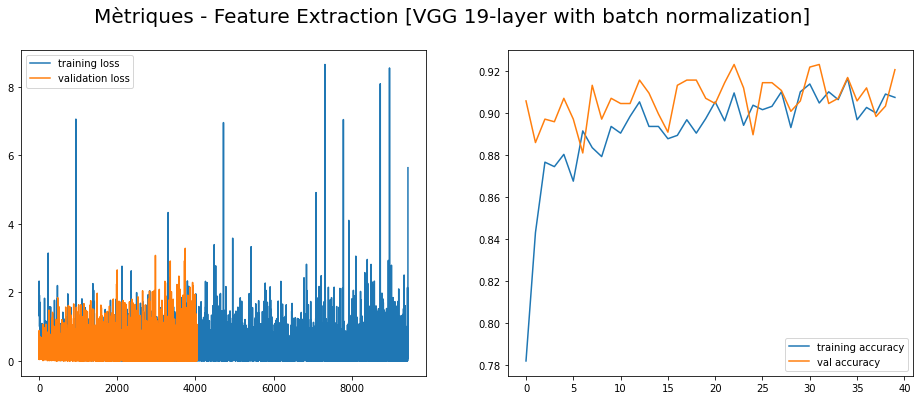

In [ ]:
# plot the losses and accuracies
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

ax1.plot(losses_vgg19_bn["train"], label="training loss")
ax1.plot(losses_vgg19_bn["val"], label="validation loss")
ax1.legend()

hist_vgg19_bn_train = torch.tensor(hist_vgg19_bn["train"], device = 'cpu')
hist_vgg19_bn_val = torch.tensor(hist_vgg19_bn["val"], device = 'cpu')
ax2.plot(hist_vgg19_bn_train,label="training accuracy")
ax2.plot(hist_vgg19_bn_val,label="val accuracy")
ax2.legend()

fig.suptitle("Mètriques - Feature Extraction [VGG 19-layer with batch normalization]", fontsize = 20)
plt.show() 

> Obtenim bons resultats però en un temps molt gran degut a la complexitat de la xarxa. Podriem probar amb VGG-11 o VGG-13 i veure com es comporta davant una xarxa més petita.

In [ ]:
# Flags - Feature Extraction
feature_extract = True
use_pretrained = True 

# Initialize the model
googlenet, input_size = initialize_model("GoogleNet", num_classes, feature_extract, use_pretrained)
googlenet = googlenet.to(device)

print("Params to learn:")
params_to_update = []
for name,param in googlenet.named_parameters():
    if param.requires_grad == True:
        params_to_update.append(param)
        print("\t",name)

print()
# Observe that all parameters are being optimized
optimizer_ft = optim.Adam(params_to_update, lr=0.001)

since_googlenet = time.time()
model_googlenet, hist_googlenet, losses_googlenet = train_model(googlenet, dataloaders_dict, criterion, optimizer_ft, num_epochs = num_epochs)
time_elapsed_googlenet  = time.time() - since_googlenet

Downloading: "https://download.pytorch.org/models/googlenet-1378be20.pth" to /root/.cache/torch/hub/checkpoints/googlenet-1378be20.pth


  0%|          | 0.00/49.7M [00:00<?, ?B/s]

Params to learn:
	 fc.weight
	 fc.bias

Epoch 0/39
----------
train Loss: 1.2416 Acc: 0.6236
val Loss: 0.6380 Acc: 0.8686

Epoch 1/39
----------
train Loss: 0.6718 Acc: 0.8091
val Loss: 0.4392 Acc: 0.8823

Epoch 2/39
----------
train Loss: 0.5610 Acc: 0.8309
val Loss: 0.3431 Acc: 0.9058

Epoch 3/39
----------
train Loss: 0.5045 Acc: 0.8379
val Loss: 0.3140 Acc: 0.9095

Epoch 4/39
----------
train Loss: 0.4621 Acc: 0.8394
val Loss: 0.3054 Acc: 0.9108

Epoch 5/39
----------
train Loss: 0.4424 Acc: 0.8522
val Loss: 0.2768 Acc: 0.9083

Epoch 6/39
----------
train Loss: 0.4443 Acc: 0.8464
val Loss: 0.2768 Acc: 0.9021

Epoch 7/39
----------
train Loss: 0.4231 Acc: 0.8575
val Loss: 0.2514 Acc: 0.9269

Epoch 8/39
----------
train Loss: 0.3827 Acc: 0.8676
val Loss: 0.2486 Acc: 0.9182

Epoch 9/39
----------
train Loss: 0.3827 Acc: 0.8713
val Loss: 0.2438 Acc: 0.9157

Epoch 10/39
----------
train Loss: 0.3992 Acc: 0.8644
val Loss: 0.2536 Acc: 0.9120

Epoch 11/39
----------
train Loss: 0.3820 Acc:

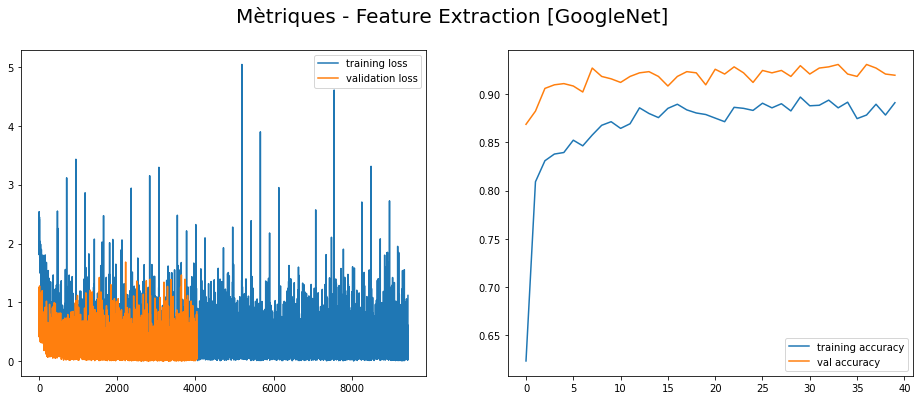

In [ ]:
# plot the losses and accuracies
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

ax1.plot(losses_googlenet["train"], label="training loss")
ax1.plot(losses_googlenet["val"], label="validation loss")
ax1.legend()

hist_googlenet_train = torch.tensor(hist_googlenet["train"], device = 'cpu')
hist_googlenet_val = torch.tensor(hist_googlenet["val"], device = 'cpu')
ax2.plot(hist_googlenet_train,label="training accuracy")
ax2.plot(hist_googlenet_val,label="val accuracy")
ax2.legend()

fig.suptitle("Mètriques - Feature Extraction [GoogleNet]", fontsize = 20)
plt.show()  

> Veiem que obtenim millor accuracy en el conjunt de test que d'entrenament. Això podría ser perquè les dades no estan ben dividides, que les del conjunt test son més facils, etc.

In [ ]:
# Flags - Feature Extraction
feature_extract = True
use_pretrained = True 

# Initialize the model
resnet101, input_size = initialize_model("resnet101", num_classes, feature_extract, use_pretrained)
resnet101 = resnet101.to(device)

print("Params to learn:")
params_to_update = []
for name,param in resnet101.named_parameters():
    if param.requires_grad == True:
        params_to_update.append(param)
        print("\t",name)

print()
# Observe that all parameters are being optimized
optimizer_ft = optim.Adam(params_to_update, lr=0.001)

since_resnet101 = time.time()
model_resnet101, hist_resnet101, losses_resnet101 = train_model(resnet101, dataloaders_dict, criterion, optimizer_ft, num_epochs = num_epochs)
time_elapsed_resnet101 = time.time() - since_resnet101

Downloading: "https://download.pytorch.org/models/resnet101-63fe2227.pth" to /root/.cache/torch/hub/checkpoints/resnet101-63fe2227.pth


  0%|          | 0.00/171M [00:00<?, ?B/s]

Params to learn:
	 fc.weight
	 fc.bias

Epoch 0/39
----------
train Loss: 0.8691 Acc: 0.7124
val Loss: 0.3565 Acc: 0.8872

Epoch 1/39
----------
train Loss: 0.4651 Acc: 0.8501
val Loss: 0.3267 Acc: 0.8848

Epoch 2/39
----------
train Loss: 0.4242 Acc: 0.8565
val Loss: 0.2633 Acc: 0.9232

Epoch 3/39
----------
train Loss: 0.3686 Acc: 0.8745
val Loss: 0.2742 Acc: 0.8996

Epoch 4/39
----------
train Loss: 0.3571 Acc: 0.8772
val Loss: 0.2799 Acc: 0.9133

Epoch 5/39
----------
train Loss: 0.3318 Acc: 0.8814
val Loss: 0.2484 Acc: 0.9207

Epoch 6/39
----------
train Loss: 0.3397 Acc: 0.8836
val Loss: 0.2549 Acc: 0.9195

Epoch 7/39
----------
train Loss: 0.3488 Acc: 0.8841
val Loss: 0.2693 Acc: 0.9108

Epoch 8/39
----------
train Loss: 0.3076 Acc: 0.8878
val Loss: 0.2610 Acc: 0.9095

Epoch 9/39
----------
train Loss: 0.2893 Acc: 0.9001
val Loss: 0.2273 Acc: 0.9281

Epoch 10/39
----------
train Loss: 0.3028 Acc: 0.8910
val Loss: 0.2498 Acc: 0.9157

Epoch 11/39
----------
train Loss: 0.3079 Acc:

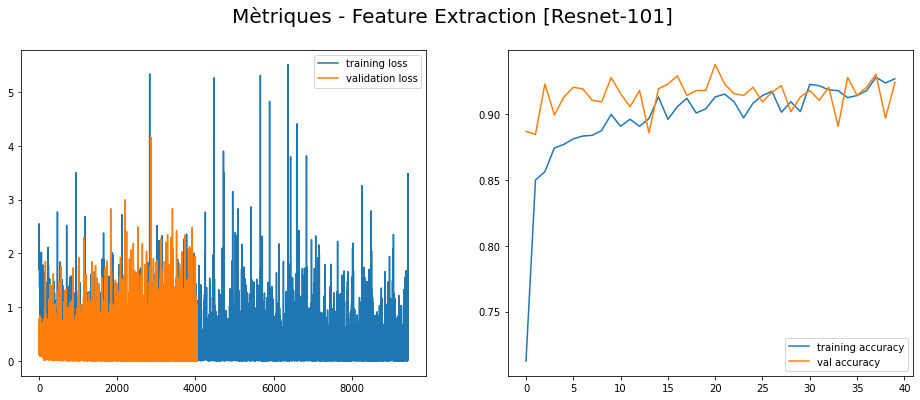

In [ ]:
# plot the losses and accuracies
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

ax1.plot(losses_resnet101["train"], label="training loss")
ax1.plot(losses_resnet101["val"], label="validation loss")
ax1.legend()

hist_resnet101_train = torch.tensor(hist_resnet101["train"], device = 'cpu')
hist_resnet101_val = torch.tensor(hist_resnet101["val"], device = 'cpu')
ax2.plot(hist_resnet101_train,label="training accuracy")
ax2.plot(hist_resnet101_val,label="val accuracy")
ax2.legend()

fig.suptitle("Mètriques - Feature Extraction [Resnet-101]", fontsize = 20)
plt.show()  

> Sembla ser que l'arquitectura Resnet funciona bé per aquest tipo de problemes, obtenim bons resultats en un temps raonable.

In [ ]:
# Flags - Feature Extraction
feature_extract = True
use_pretrained = True 

# Initialize the model
alexnet, input_size = initialize_model("alexnet", num_classes, feature_extract, use_pretrained)
alexnet = alexnet.to(device)

print("Params to learn:")
params_to_update = []
for name,param in alexnet.named_parameters():
    if param.requires_grad == True:
        params_to_update.append(param)
        print("\t",name)

print()
# Observe that all parameters are being optimized
optimizer_ft = optim.Adam(params_to_update, lr=0.001)

since_alexnet = time.time()
model_alexnet, hist_alexnet, losses_alexnet = train_model(alexnet, dataloaders_dict, criterion, optimizer_ft, num_epochs = num_epochs)
time_elapsed_alexnet = time.time() - since_alexnet

Downloading: "https://download.pytorch.org/models/alexnet-owt-7be5be79.pth" to /root/.cache/torch/hub/checkpoints/alexnet-owt-7be5be79.pth


  0%|          | 0.00/233M [00:00<?, ?B/s]

Params to learn:
	 classifier.6.weight
	 classifier.6.bias

Epoch 0/39
----------
train Loss: 0.3418 Acc: 0.8836
val Loss: 0.1914 Acc: 0.9343

Epoch 1/39
----------
train Loss: 0.1412 Acc: 0.9468
val Loss: 0.1764 Acc: 0.9504

Epoch 2/39
----------
train Loss: 0.0875 Acc: 0.9686
val Loss: 0.2042 Acc: 0.9356

Epoch 3/39
----------
train Loss: 0.0792 Acc: 0.9729
val Loss: 0.1711 Acc: 0.9504

Epoch 4/39
----------
train Loss: 0.0590 Acc: 0.9814
val Loss: 0.1876 Acc: 0.9380

Epoch 5/39
----------
train Loss: 0.0700 Acc: 0.9755
val Loss: 0.1776 Acc: 0.9480

Epoch 6/39
----------
train Loss: 0.0428 Acc: 0.9872
val Loss: 0.1983 Acc: 0.9430

Epoch 7/39
----------
train Loss: 0.0633 Acc: 0.9782
val Loss: 0.1769 Acc: 0.9430

Epoch 8/39
----------
train Loss: 0.0415 Acc: 0.9825
val Loss: 0.2278 Acc: 0.9405

Epoch 9/39
----------
train Loss: 0.0373 Acc: 0.9867
val Loss: 0.2144 Acc: 0.9430

Epoch 10/39
----------
train Loss: 0.0259 Acc: 0.9899
val Loss: 0.2923 Acc: 0.9405

Epoch 11/39
----------
tra

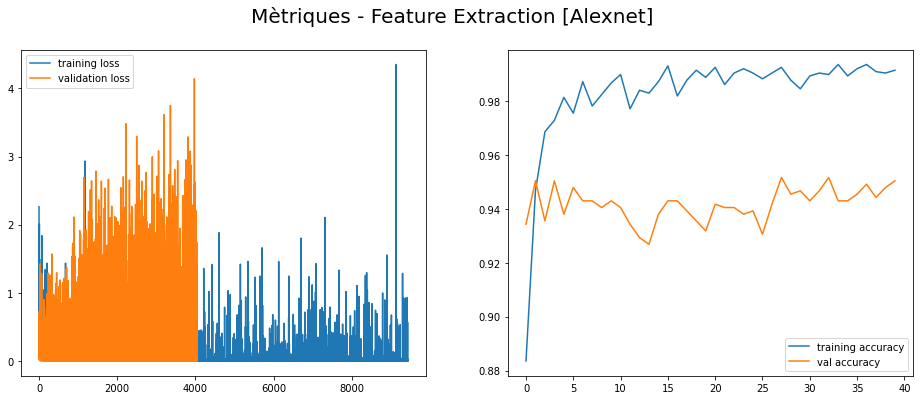

In [ ]:
# plot the losses and accuracies
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

ax1.plot(losses_alexnet["train"], label="training loss")
ax1.plot(losses_alexnet["val"], label="validation loss")
ax1.legend()

hist_alexnet_train = torch.tensor(hist_alexnet["train"], device = 'cpu')
hist_alexnet_val = torch.tensor(hist_alexnet["val"], device = 'cpu')
ax2.plot(hist_alexnet_train,label="training accuracy")
ax2.plot(hist_alexnet_val,label="val accuracy")
ax2.legend()

fig.suptitle("Mètriques - Feature Extraction [Alexnet]", fontsize = 20)
plt.show()  

> Veiem que el model te un **overfitting** molt gran, pero obté bons resultats en molt poc temps, hauriem de baixar el learing rate i veure com reacciona.

In [ ]:
# Flags - Feature Extraction
feature_extract = True
use_pretrained = True 

# Initialize the model
squeezenet, input_size = initialize_model("squeezenet", num_classes, feature_extract, use_pretrained)
squeezenet = squeezenet.to(device)

print("Params to learn:")
params_to_update = []
for name,param in squeezenet.named_parameters():
    if param.requires_grad == True:
        params_to_update.append(param)
        print("\t",name)

print()
# Observe that all parameters are being optimized
optimizer_ft = optim.Adam(params_to_update, lr=0.001)

since_squeezenet = time.time()
model_squeezenet, hist_squeezenet, losses_squeezenet = train_model(squeezenet, dataloaders_dict, criterion, optimizer_ft, num_epochs = num_epochs)
time_elapsed_squeezenet = time.time() - since_squeezenet

Downloading: "https://download.pytorch.org/models/squeezenet1_1-b8a52dc0.pth" to /root/.cache/torch/hub/checkpoints/squeezenet1_1-b8a52dc0.pth


  0%|          | 0.00/4.73M [00:00<?, ?B/s]

Params to learn:
	 classifier.1.weight
	 classifier.1.bias

Epoch 0/39
----------
train Loss: 0.5968 Acc: 0.8107
val Loss: 0.2516 Acc: 0.8984

Epoch 1/39
----------
train Loss: 0.2064 Acc: 0.9335
val Loss: 0.1793 Acc: 0.9343

Epoch 2/39
----------
train Loss: 0.1541 Acc: 0.9442
val Loss: 0.1742 Acc: 0.9405

Epoch 3/39
----------
train Loss: 0.1163 Acc: 0.9649
val Loss: 0.2172 Acc: 0.9170

Epoch 4/39
----------
train Loss: 0.0987 Acc: 0.9686
val Loss: 0.1564 Acc: 0.9368

Epoch 5/39
----------
train Loss: 0.0797 Acc: 0.9771
val Loss: 0.1559 Acc: 0.9480

Epoch 6/39
----------
train Loss: 0.0614 Acc: 0.9846
val Loss: 0.1971 Acc: 0.9219

Epoch 7/39
----------
train Loss: 0.0583 Acc: 0.9830
val Loss: 0.1933 Acc: 0.9120

Epoch 8/39
----------
train Loss: 0.0620 Acc: 0.9809
val Loss: 0.2103 Acc: 0.9257

Epoch 9/39
----------
train Loss: 0.0488 Acc: 0.9862
val Loss: 0.1568 Acc: 0.9455

Epoch 10/39
----------
train Loss: 0.0416 Acc: 0.9862
val Loss: 0.1706 Acc: 0.9455

Epoch 11/39
----------
tra

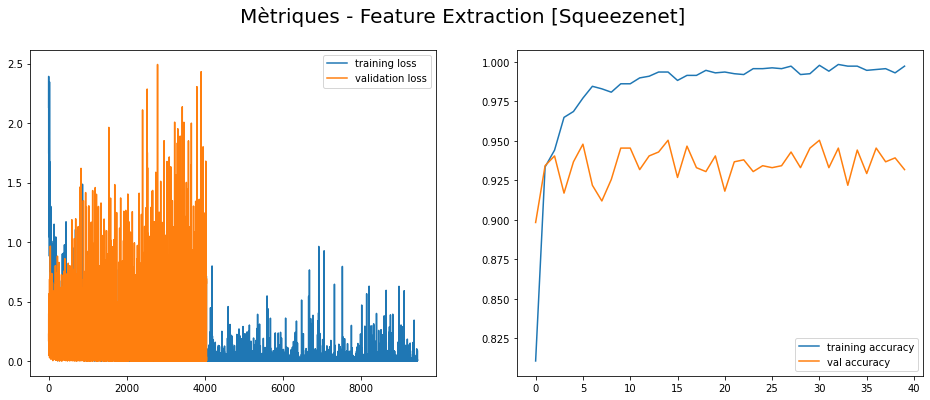

In [ ]:
# plot the losses and accuracies
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

ax1.plot(losses_squeezenet["train"], label="training loss")
ax1.plot(losses_squeezenet["val"], label="validation loss")
ax1.legend()

hist_squeezenet_train = torch.tensor(hist_squeezenet["train"], device = 'cpu')
hist_squeezenet_val = torch.tensor(hist_squeezenet["val"], device = 'cpu')
ax2.plot(hist_squeezenet_train,label="training accuracy")
ax2.plot(hist_squeezenet_val,label="val accuracy")
ax2.legend()

fig.suptitle("Mètriques - Feature Extraction [Squeezenet]", fontsize = 20)
plt.show()  

> Veiem que el model també pateix *overfitting* però en menor mesura que alexnet. El seguent experiment que faría seria reduir el learing rate i augmentar el numero d'epochs.

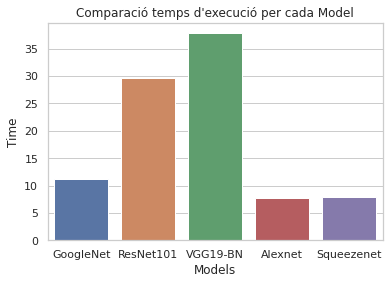

In [ ]:
sns.set_theme(style = "whitegrid")
df_time = pd.DataFrame({"Models":
                                ["GoogleNet",
                                 "ResNet101",
                                 "VGG19-BN",
                                 "Alexnet",
                                 "Squeezenet"],
                        
                        "Time": [time_elapsed_googlenet/60, 
                                 time_elapsed_resnet101/60,
                                 time_elapsed_vgg19_bn/60,
                                 time_elapsed_alexnet/60,
                                 time_elapsed_squeezenet/60]
                        })
sns.barplot(x = "Models", y = "Time", data = df_time).set(title = "Comparació temps d'execució per cada Model")
plt.show()

> Les xarxes que han tardat més (més complexes) han conseguit resultats bons sense overfitting però en un temps massa alt.

> Seguiria provant amb aquestes xarxes més petites que sembla que funcionen raonablement bé en un temps molt petit.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:41: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.


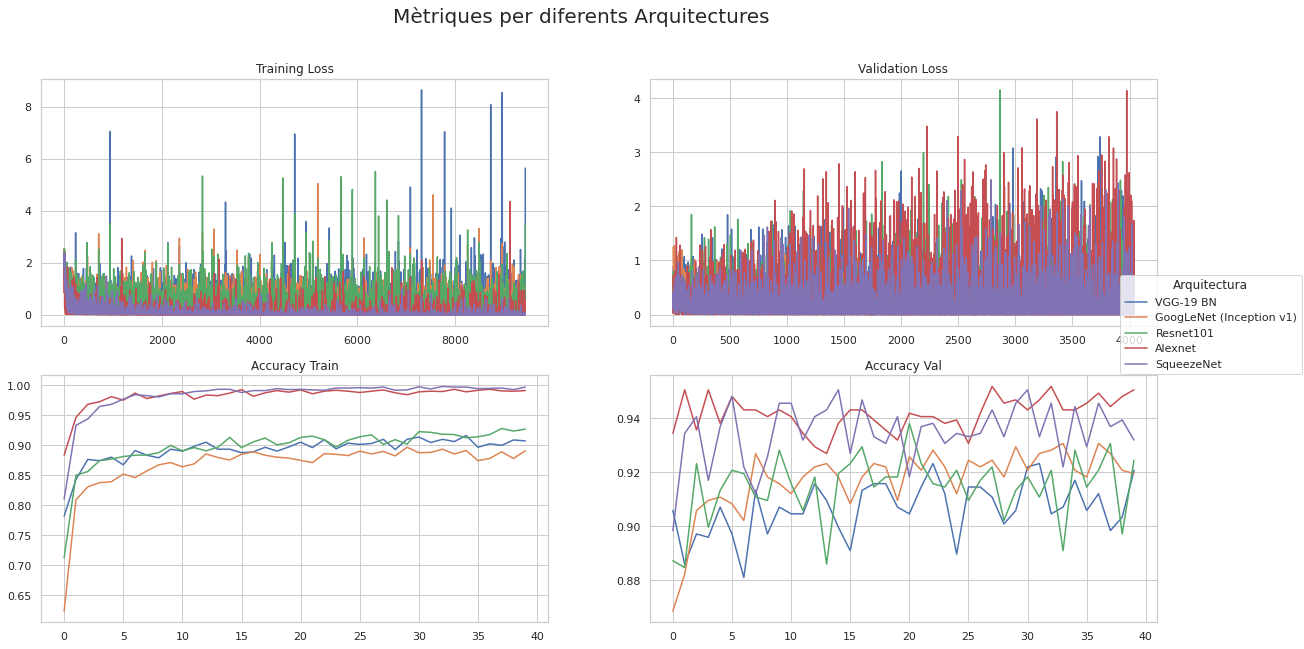

In [ ]:
fig, axs = plt.subplots(2, 2, figsize=(20, 10))

# Losses
axs[0, 0].plot(losses_vgg19_bn["train"])
axs[0, 0].plot(losses_googlenet["train"])
axs[0, 0].plot(losses_resnet101["train"])
axs[0, 0].plot(losses_alexnet["train"])
axs[0, 0].plot(losses_squeezenet["train"])
axs[0, 0].set_title("Training Loss")

axs[0, 1].plot(losses_vgg19_bn["val"])
axs[0, 1].plot(losses_googlenet["val"])
axs[0, 1].plot(losses_resnet101["val"])
axs[0, 1].plot(losses_alexnet["val"])
axs[0, 1].plot(losses_squeezenet["val"])
axs[0, 1].set_title("Validation Loss")

# Accuracy
axs[1, 0].plot(hist_vgg19_bn_train)
axs[1, 0].plot(hist_googlenet_train)
axs[1, 0].plot(hist_resnet101_train)
axs[1, 0].plot(hist_alexnet_train)
axs[1, 0].plot(hist_squeezenet_train)
axs[1, 0].set_title("Accuracy Train")

axs[1, 1].plot(hist_vgg19_bn_val)
axs[1, 1].plot(hist_googlenet_val)
axs[1, 1].plot(hist_resnet101_val)
axs[1, 1].plot(hist_alexnet_val)
axs[1, 1].plot(hist_squeezenet_val)
axs[1, 1].set_title("Accuracy Val")

# Shared legend
line_labels = ["VGG-19 BN", "GoogLeNet (Inception v1)", "Resnet101", "Alexnet", "SqueezeNet"]
# Create the legend
fig.legend(
           axs,     # The line objects
           labels=line_labels,   # The labels for each line
           loc="center right",   # Position of legend
           borderaxespad=0.3,    # Small spacing around legend box
           title="Arquitectura"  # Title for the legend
           )
fig.suptitle("Mètriques per diferents Arquitectures", fontsize = 20)
plt.show()

> Veiem que hi ha moltisim sorroll, clarament s'ha de baixar el learning rate i agumentar el numeor d'epochs de totes les execucions.

> Sembla que el millor model podria ser Alexnet, tot i que hem de tenir en compte el overfitting, es podria millorar encara més.

------------

In [ ]:
data_dir = "./data/MIT_scenes/"

# ResNet input size
input_size = (224,224)

# Just normalization
data_transforms = {
    'train': transforms.Compose([
        transforms.Resize(input_size),
        transforms.CenterCrop(input_size),
        transforms.RandomHorizontalFlip(),
        transforms.ColorJitter(brightness=0.5, contrast=0.5, saturation=0.5, hue=0.1),
        transforms.RandomRotation(degrees = 10),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
    'val': transforms.Compose([
        transforms.Resize(input_size),
        transforms.CenterCrop(input_size),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
}

print("Initializing Datasets and Dataloaders...")


# Batch size for training (change depending on how much memory you have)
batch_size = 32

# Create training and validation datasets
image_datasets = {x: datasets.ImageFolder(os.path.join(data_dir, x), data_transforms[x]) for x in ['train', 'val']}
# Create training and validation dataloaders
dataloaders_dict = {x: torch.utils.data.DataLoader(image_datasets[x], batch_size=batch_size, shuffle=True, num_workers=2) for x in ['train', 'val']}

Initializing Datasets and Dataloaders...


In [ ]:
# Flags - Feature Extraction
feature_extract = True
use_pretrained = True
num_classes = 8
num_epochs = 120

# Initialize the model
alexnet, input_size = initialize_model("alexnet", num_classes, feature_extract, use_pretrained)
alexnet = alexnet.to(device)

print("Params to learn:")
params_to_update = []
for name,param in alexnet.named_parameters():
    if param.requires_grad == True:
        params_to_update.append(param)
        print("\t",name)

print()
# Observe that all parameters are being optimized
optimizer_ft = optim.Adam(params_to_update, lr= 3e-4)
# Setup the loss fxn
criterion = nn.CrossEntropyLoss()

since_alexnet = time.time()
model_alexnet, hist_alexnet, losses_alexnet = train_model(alexnet, dataloaders_dict, criterion, optimizer_ft, num_epochs = num_epochs)
time_elapsed_alexnet = time.time() - since_alexnet

Params to learn:
	 classifier.6.weight
	 classifier.6.bias

Epoch 0/119
----------
train Loss: 0.8190 Acc: 0.7560
val Loss: 0.3287 Acc: 0.9071

Epoch 1/119
----------
train Loss: 0.3616 Acc: 0.8915
val Loss: 0.2335 Acc: 0.9318

Epoch 2/119
----------
train Loss: 0.2905 Acc: 0.9128
val Loss: 0.2042 Acc: 0.9442

Epoch 3/119
----------
train Loss: 0.2720 Acc: 0.9102
val Loss: 0.1959 Acc: 0.9455

Epoch 4/119
----------
train Loss: 0.2387 Acc: 0.9203
val Loss: 0.1758 Acc: 0.9480

Epoch 5/119
----------
train Loss: 0.2244 Acc: 0.9266
val Loss: 0.1564 Acc: 0.9591

Epoch 6/119
----------
train Loss: 0.1952 Acc: 0.9373
val Loss: 0.1527 Acc: 0.9566

Epoch 7/119
----------
train Loss: 0.1856 Acc: 0.9431
val Loss: 0.1584 Acc: 0.9504

Epoch 8/119
----------
train Loss: 0.1920 Acc: 0.9383
val Loss: 0.1489 Acc: 0.9579

Epoch 9/119
----------
train Loss: 0.1831 Acc: 0.9415
val Loss: 0.1555 Acc: 0.9504

Epoch 10/119
----------
train Loss: 0.1765 Acc: 0.9373
val Loss: 0.1470 Acc: 0.9529

Epoch 11/119
--

> Finalment, amb totes els experiments que hem fet al llarg de la pràctica i les conclusions que treiem d'aquests ens han permet definir un model que aconsegeuix al voltant de **97% d'accuracy** en el conjunt de test sense pràcticament overfitting.